In [1]:
import os
os.chdir(r'C:\Users\anchhabra\Analytics_Challenge_3')
os.getcwd()

'C:\\Users\\anchhabra\\Analytics_Challenge_3'

In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing Data

In [4]:
train_data = pd.read_csv('train_jqd04QH.csv')
test_data = pd.read_csv('test_KaymcHn.csv')
train_data.head(3)
test_data.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17


In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
enrollee_id               15021 non-null int64
ci

# Exploratory Data Analysis

## Event Rate

In [6]:
# train_data['target'].value_counts()
event_cnt = train_data.loc[:,['enrollee_id','target']].groupby('target').agg({'enrollee_id':'count'})
event_cnt['percentage'] = 100*event_cnt['enrollee_id']/event_cnt['enrollee_id'].sum()
event_cnt

,enrollee_id,percentage
target,,
0,15934,86.79122
1,2425,13.20878


## Missing value treatment

In [7]:
mis_val = train_data.isnull().sum()
mis_val_percent = 100* train_data.isnull().sum()/ len(train_data)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table.sort_values('Missing Values',ascending = False)

,Missing Values,% of Total Values
company_type,5039,27.447029
company_size,4779,26.030830
gender,4098,22.321477
major_discipline,2838,15.458358
education_level,457,2.489242
last_new_job,367,1.999020
enrolled_university,342,1.862847
experience,59,0.321368
enrollee_id,0,0.000000
city,0,0.000000


In [8]:
mis_val = test_data.isnull().sum()
mis_val_percent = 100* mis_val/len(test_data)
test_data_table = pd.concat([mis_val,mis_val_percent],axis=1)
test_data_table = test_data_table.rename(columns = {0 : 'Missing Values', 1: '% of Total Values'})
test_data_table.sort_values('% of Total Values', ascending = False)

,Missing Values,% of Total Values
company_type,4330,28.826310
company_size,4051,26.968910
gender,3388,22.555090
major_discipline,2393,15.931030
education_level,395,2.629652
last_new_job,304,2.023833
enrolled_university,279,1.857400
experience,44,0.292923
enrollee_id,0,0.000000
city,0,0.000000


### Replacing with Unknown category

In [9]:
from sklearn.impute import SimpleImputer # For categorical columns in a dataframe
from sklearn.base import TransformerMixin

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [11]:
train_data['company_type'] = imputer.fit_transform(train_data[['company_type']])
train_data['company_size'] = imputer.fit_transform(train_data[['company_size']])
train_data['gender'] = imputer.fit_transform(train_data[['gender']])
train_data['major_discipline'] = imputer.fit_transform(train_data[['major_discipline']])

train_data['last_new_job'] = imputer_mf.fit_transform(train_data[['last_new_job']])
train_data['enrolled_university'] = imputer_mf.fit_transform(train_data[['enrolled_university']])
train_data['experience'] = imputer_mf.fit_transform(train_data[['experience']])
train_data['education_level'] = imputer_mf.fit_transform(train_data[['education_level']])
train_data.isnull().sum()

test_data['company_type'] = imputer.fit_transform(test_data[['company_type']])
test_data['company_size'] = imputer.fit_transform(test_data[['company_size']])
test_data['gender'] = imputer.fit_transform(test_data[['gender']])
test_data['major_discipline'] = imputer.fit_transform(test_data[['major_discipline']])

test_data['last_new_job'] = imputer_mf.fit_transform(test_data[['last_new_job']])
test_data['enrolled_university'] = imputer_mf.fit_transform(test_data[['enrolled_university']])
test_data['experience'] = imputer_mf.fit_transform(test_data[['experience']])
test_data['education_level'] = imputer_mf.fit_transform(test_data[['education_level']])
test_data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

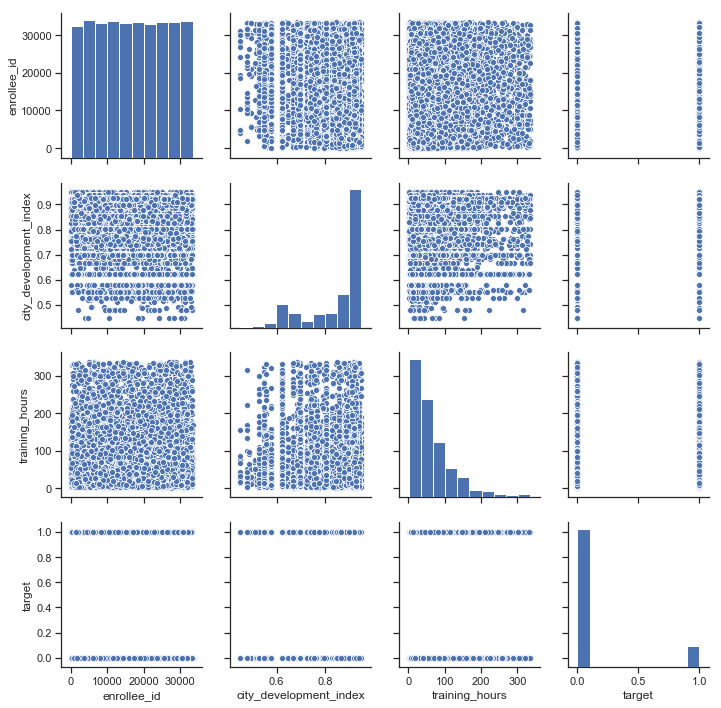

In [285]:
sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
g = sns.pairplot(train_data)

#### Univariate and Bi-variate Analysis

##### City
Most popular Cities

In [307]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

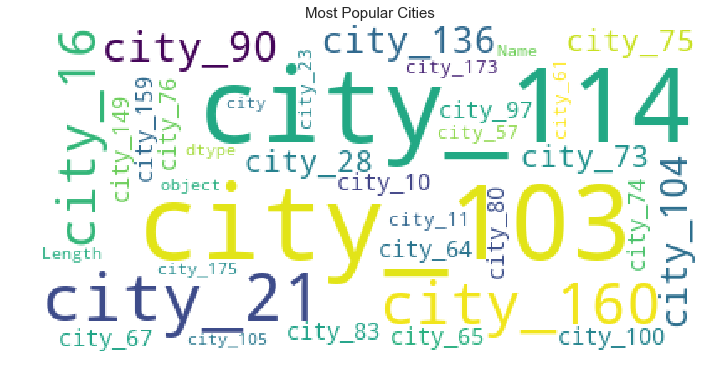

In [346]:
stopword = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train_data['city']))
plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Cities', fontsize = 15)
plt.axis('off')
plt.show();

##### City Development Index

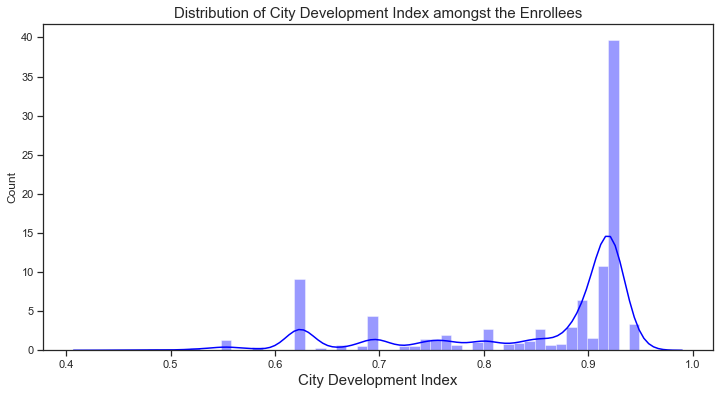

In [345]:
# checking the distribution of the avg_training score of the Employees
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(train_data['city_development_index'], color = 'blue')
plt.title('Distribution of City Development Index amongst the Enrollees', fontsize = 15)
plt.xlabel('City Development Index', fontsize = 15)
plt.ylabel('Count')
plt.show();

##### Gender

In [272]:
gender_cnt = train_data.loc[:,['enrollee_id','gender']].groupby('gender').agg({'enrollee_id':'count'}).sort_values('enrollee_id',ascending = False)
gender_cnt['percentage'] = 100* gender_cnt['enrollee_id']/ gender_cnt['enrollee_id'].sum()
gender_cnt

,enrollee_id,percentage
gender,,
Male,12884,70.178114
Unknown,4098,22.321477
Female,1188,6.470941
Other,189,1.029468


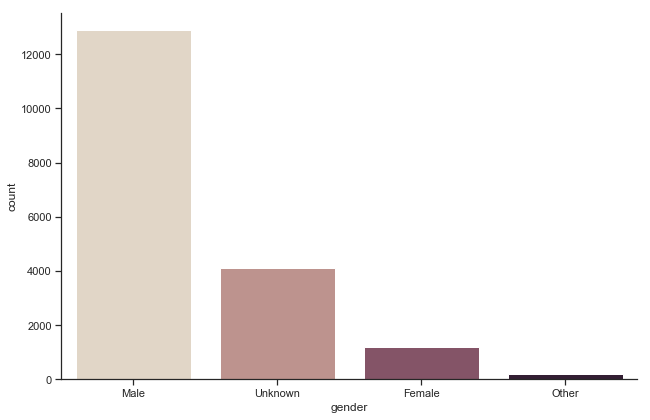

In [290]:
gender_cnt_order = train_data.groupby('gender')['enrollee_id'].sum().sort_values(ascending=False).index.values
ax = sns.catplot(x = "gender",kind='count',palette='ch:.25',data=train_data,size=6, aspect=1.5,order=gender_cnt_order)

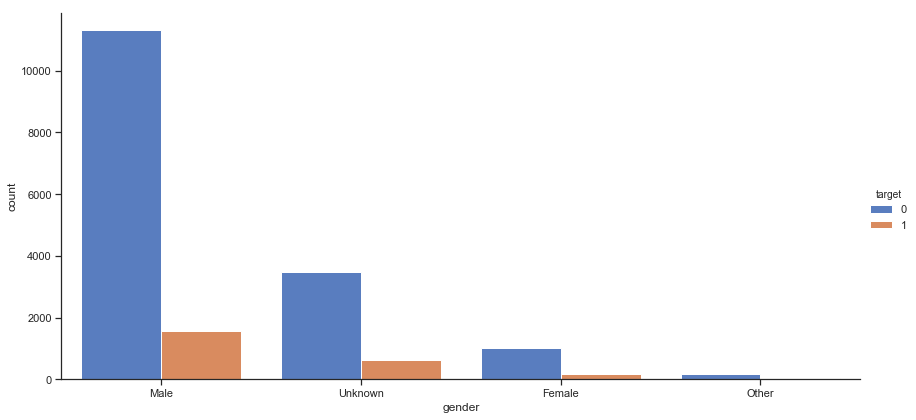

In [292]:
ax= sns.catplot(x = 'gender',kind ='count',hue = 'target',palette="muted",data=train_data, size=6, aspect=2)

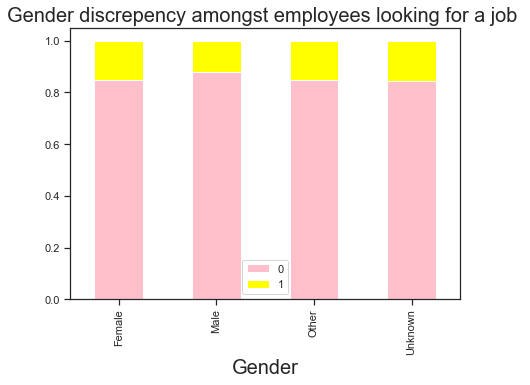

In [437]:
data = pd.crosstab(train_data['gender'], train_data['target'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])
plt.title('Gender discrepency amongst employees looking for a job ', fontsize = 20)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show();

##### relevent_experience

In [295]:
relevent_exp_cnt = train_data.loc[:,['enrollee_id','relevent_experience']].groupby('relevent_experience').agg({'enrollee_id':'count'})
relevent_exp_cnt['percentage'] = 100* relevent_exp_cnt['enrollee_id']/relevent_exp_cnt['enrollee_id'].sum()
relevent_exp_cnt

,enrollee_id,percentage
relevent_experience,,
Has relevent experience,13596,74.056321
No relevent experience,4763,25.943679


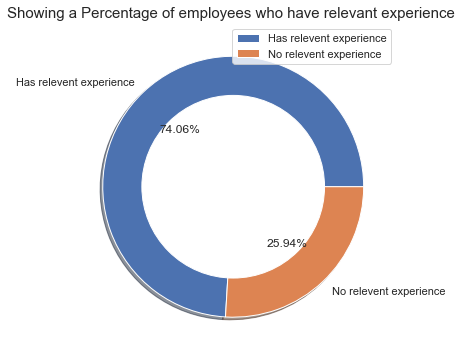

In [347]:
# plotting a donut chart for visualizing each of the recruitment channel's share
size = [13596, 4763]
# colors = ['#66b3ff', '#ff9999']
labels = "Has relevent experience", "No relevent experience"
my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (6, 6)
# colors = colors
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%');
plt.title('Showing a Percentage of employees who have relevant experience ', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show();

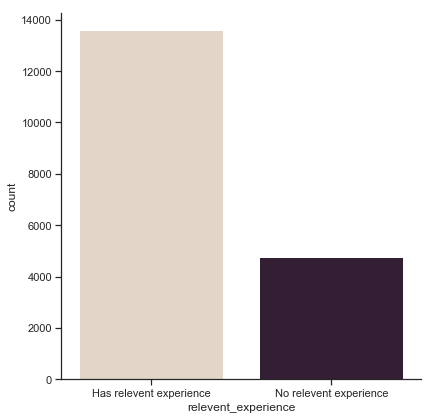

In [305]:
relvent_exp_order = train_data.groupby('relevent_experience')['enrollee_id'].count().sort_values(ascending=False).index.values
ax = sns.catplot(x = 'relevent_experience', kind = 'count',palette='ch:.25',data = train_data,size = 6, aspect = 1,
                order = relvent_exp_order)

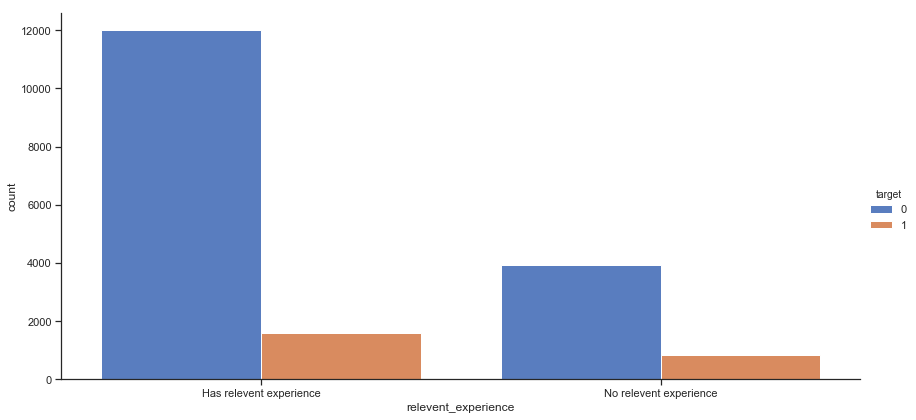

In [306]:
ax = sns.catplot(x = 'relevent_experience', kind = 'count', hue = 'target',palette="muted",data=train_data, size=6, aspect=2)

##### enrolled_university

In [360]:
# train_data['enrolled_university'].value_counts()

enrolled_cnt =  train_data.loc[:,['enrolled_university','enrollee_id']].groupby('enrolled_university').agg({'enrollee_id':'count'}).sort_values('enrollee_id',ascending =False)
enrolled_cnt['percentage'] = 100 * enrolled_cnt['enrollee_id']/ enrolled_cnt['enrollee_id'].sum()
enrolled_cnt

,enrollee_id,percentage
enrolled_university,,
no_enrollment,14001,76.262324
Full time course,3187,17.359333
Part time course,1171,6.378343


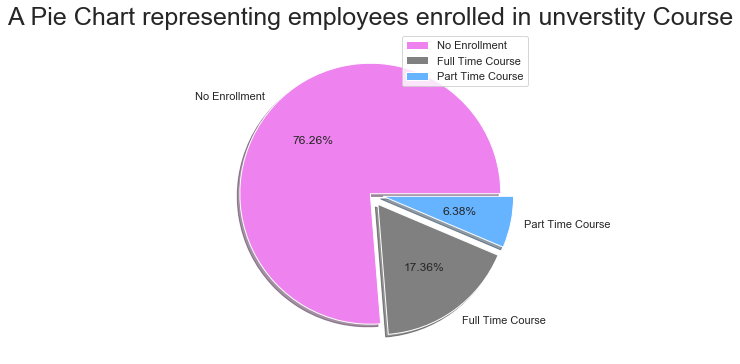

In [357]:
# plotting a pie chart
size = [14001, 3187,1171]
labels = "No Enrollment", "Full Time Course","Part Time Course"
colors = ['violet', 'grey','#66b3ff']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart representing employees enrolled in unverstity Course', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show();

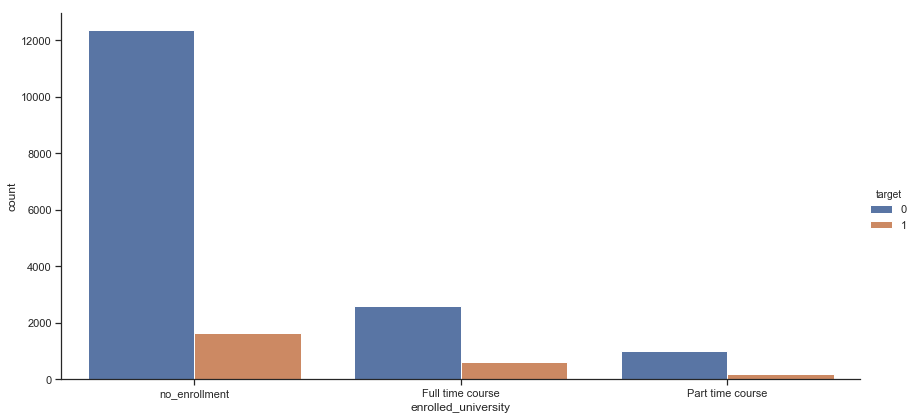

In [361]:
ax = sns.catplot(x = 'enrolled_university',kind = 'count',hue = 'target',data = train_data,size=6, aspect=2)

##### Training Hourse

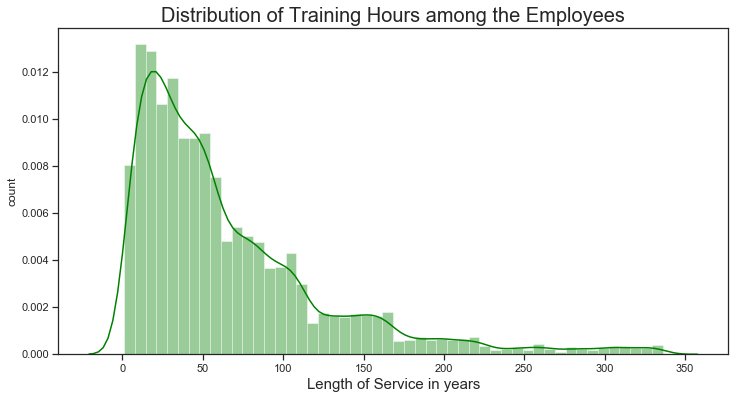

In [373]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(train_data['training_hours'], color = 'green')
plt.title('Distribution of Training Hours among the Employees', fontsize = 20)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show();

##### Major Discipline

In [386]:
discipline_cnt = train_data.loc[:,['major_discipline','enrollee_id']].groupby('major_discipline').agg({'enrollee_id':'count'}).sort_values('enrollee_id',ascending =False)
discipline_cnt['percentage'] = 100* discipline_cnt['enrollee_id']/discipline_cnt['enrollee_id'].sum()
discipline_cnt

,enrollee_id,percentage
major_discipline,,
STEM,13738,74.829784
Unknown,2838,15.458358
Humanities,688,3.747481
Other,343,1.868293
Business Degree,307,1.672204
Arts,239,1.301814
No Major,206,1.122065


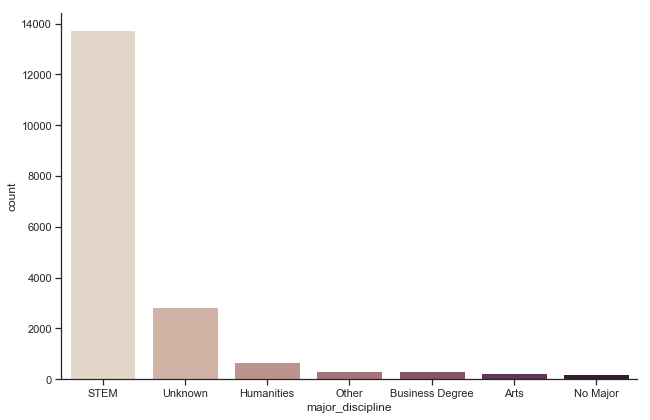

In [384]:
displine_cnt_order = train_data.groupby('major_discipline')['enrollee_id'].count().sort_values(ascending = False).index.values
ax = sns.catplot(x = 'major_discipline', kind = 'count',data = train_data,palette='ch:.25',size = 6, aspect = 1.5,
                 order = displine_cnt_order)

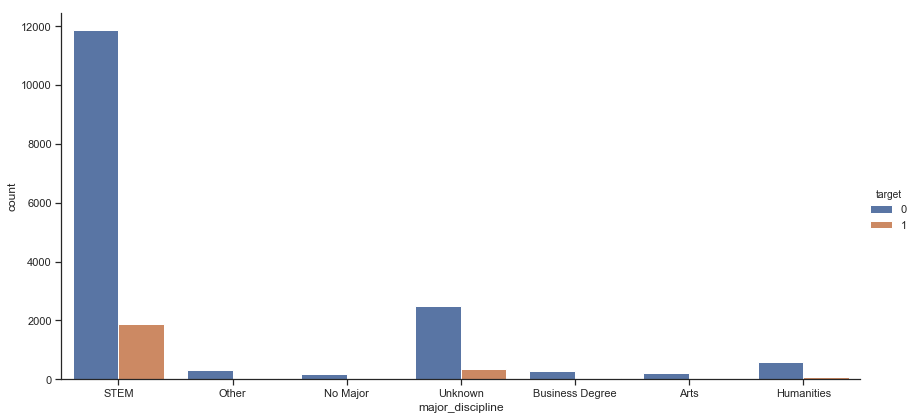

In [390]:
ax = sns.catplot(x = 'major_discipline',kind = 'count',hue = 'target',data=train_data, size = 6, aspect = 2)

##### Experience

In [395]:
experience_cnt = train_data.loc[:,['experience','enrollee_id']].groupby('experience').agg({'enrollee_id':'count'}).sort_values('enrollee_id',ascending = False)
experience_cnt['percentage'] = 100* experience_cnt['enrollee_id']/experience_cnt['enrollee_id'].sum()
experience_cnt

,enrollee_id,percentage
experience,,
>20,3496,19.042432
5,1309,7.130018
4,1250,6.808650
3,1159,6.312980
6,1125,6.127785
2,992,5.403344
9,979,5.332534
10,967,5.267171
7,950,5.174574


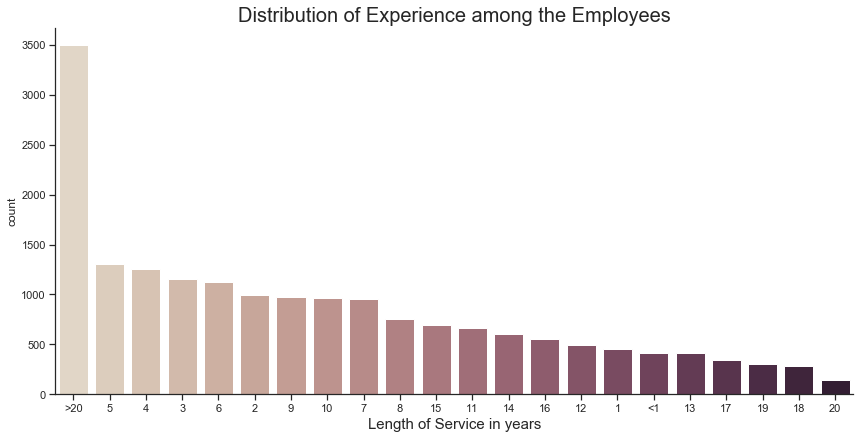

In [401]:
displine_cnt_order = train_data.groupby('experience')['enrollee_id'].count().sort_values(ascending = False).index.values
sns.catplot(x = 'experience', kind = 'count',data = train_data,palette='ch:.25',size = 6, aspect = 2,
            order = displine_cnt_order)
plt.title('Distribution of Experience among the Employees', fontsize = 20)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show();

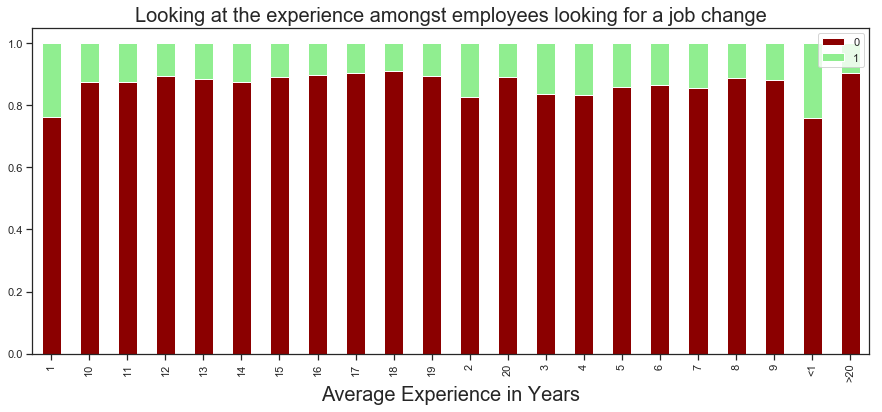

In [409]:
# scatter plot between average training score and is_promoted
data = pd.crosstab(train_data['experience'], train_data['target'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 6), 
                                                   color = ['darkred', 'lightgreen'])
plt.title('Looking at the experience amongst employees looking for a job change', fontsize = 20)
plt.xlabel('Average Experience in Years', fontsize = 20)
plt.legend()
plt.show();

##### Company Size

In [410]:
company_size_cnt = train_data.loc[:,['company_size','enrollee_id']].groupby('company_size').agg({'enrollee_id':'count'}).sort_values('enrollee_id',ascending = False)
company_size_cnt['percentage'] = 100* company_size_cnt['enrollee_id']/company_size_cnt['enrollee_id'].sum()
company_size_cnt

,enrollee_id,percentage
company_size,,
Unknown,4779,26.030830
50-99,3120,16.994390
100-500,2698,14.695790
10000+,2044,11.133504
10/49,1466,7.985184
1000-4999,1399,7.620241
<10,1360,7.407811
500-999,902,4.913122
5000-9999,591,3.219130


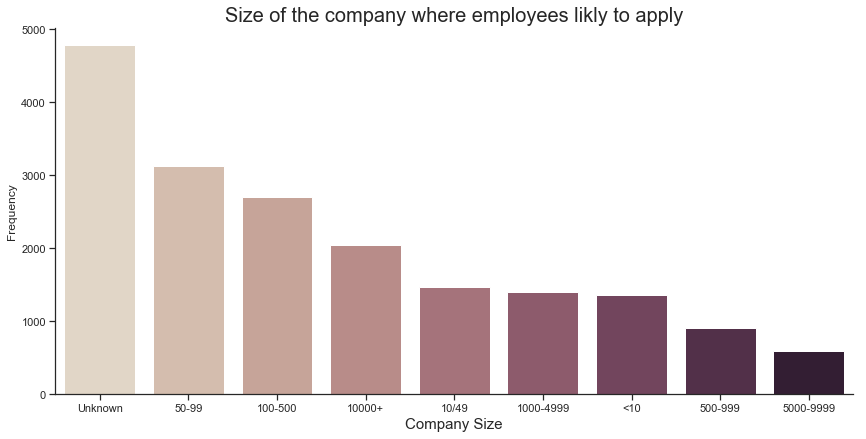

In [413]:
company_cnt_order = train_data.groupby('company_size')['enrollee_id'].count().sort_values(ascending = False).index.values
plt.rcParams['figure.figsize'] = (17, 7)
sns.catplot(x = 'company_size', kind = 'count',data = train_data,palette='ch:.25',size = 6, aspect = 2,
            order = company_cnt_order)
plt.title('Size of the company where employees likly to apply', fontsize = 20)
plt.xlabel('Company Size', fontsize = 15)
plt.ylabel('Frequency')
plt.show();

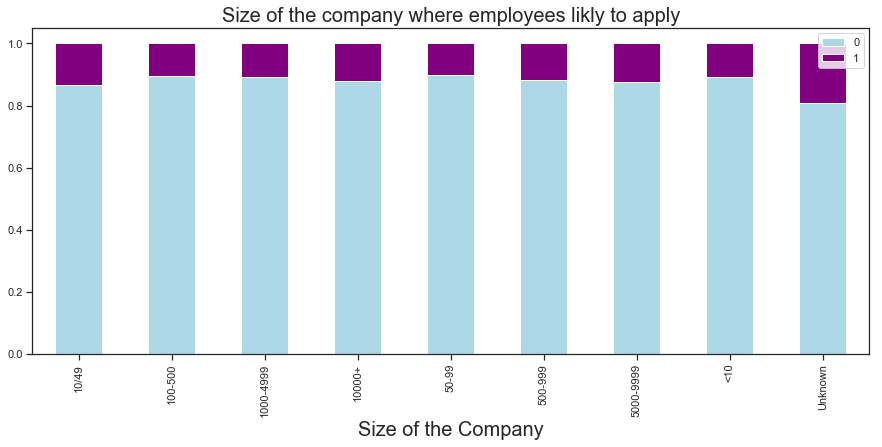

In [417]:
data = pd.crosstab(train_data['company_size'], train_data['target'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 6), color = ['lightblue', 'purple'])

plt.title('Size of the company where employees likly to apply', fontsize = 20)
plt.xlabel('Size of the Company', fontsize = 20)
plt.legend()
plt.show();

##### Company Type

In [421]:
company_type_cnt = train_data.loc[:,['company_type','enrollee_id']].groupby('company_type').agg({'enrollee_id':'count'}).sort_values('enrollee_id',ascending = False)
company_type_cnt['percentage'] = 100* company_type_cnt['enrollee_id']/company_type_cnt['enrollee_id'].sum()
company_type_cnt

,enrollee_id,percentage
company_type,,
Pvt Ltd,10051,54.746991
Unknown,5039,27.447029
Funded Startup,1038,5.653903
Public Sector,996,5.425132
Early Stage Startup,582,3.170107
NGO,534,2.908655
Other,119,0.648183


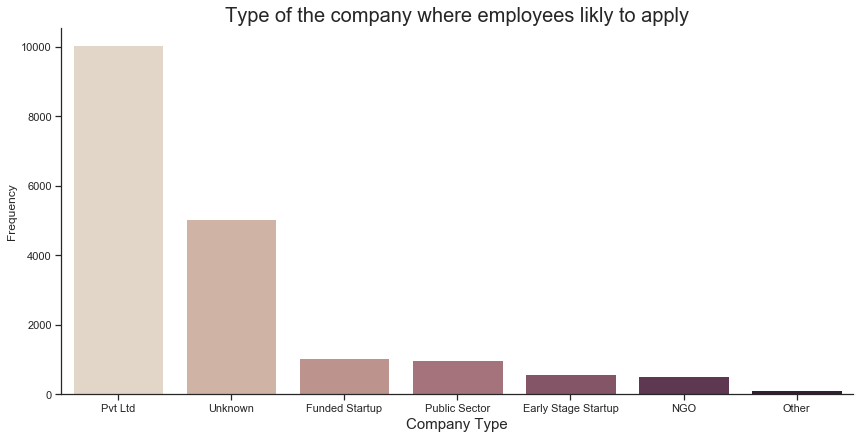

In [422]:
company_cnt_order = train_data.groupby('company_type')['enrollee_id'].count().sort_values(ascending = False).index.values
plt.rcParams['figure.figsize'] = (17, 7)
sns.catplot(x = 'company_type', kind = 'count',data = train_data,palette='ch:.25',size = 6, aspect = 2,
            order = company_cnt_order)
plt.title('Type of the company where employees likly to apply', fontsize = 20)
plt.xlabel('Company Type', fontsize = 15)
plt.ylabel('Frequency')
plt.show();

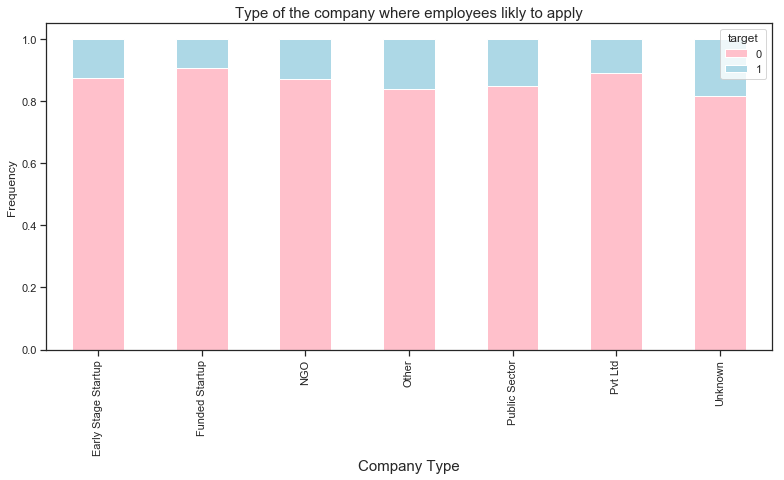

In [428]:
data = pd.crosstab(train_data['company_type'], train_data['target'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (13,6), color = ['pink', 'lightblue'])
plt.title('Type of the company where employees likly to apply', fontsize = 15)
plt.xlabel('Company Type', fontsize = 15)
plt.ylabel('Frequency')
plt.show();

##### Last new Job

In [429]:
last_job_cnt = train_data.loc[:,['last_new_job','enrollee_id']].groupby('last_new_job').agg({'enrollee_id':'count'}).sort_values('enrollee_id',ascending = False)
last_job_cnt['percentage'] = 100* last_job_cnt['enrollee_id']/last_job_cnt['enrollee_id'].sum()
last_job_cnt

,enrollee_id,percentage
last_new_job,,
1,7934,43.215861
>4,3339,18.187265
2,2835,15.442018
never,2186,11.906967
4,1038,5.653903
3,1027,5.593987


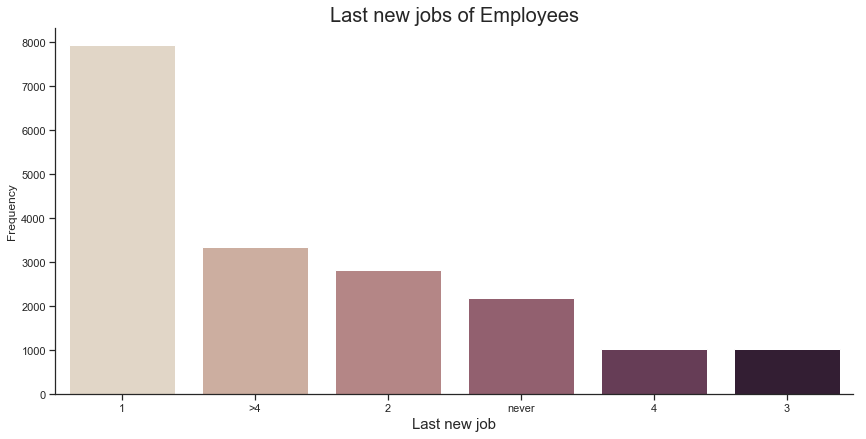

In [431]:
last_cnt_order = train_data.groupby('last_new_job')['enrollee_id'].count().sort_values(ascending = False).index.values
plt.rcParams['figure.figsize'] = (17, 7)
sns.catplot(x = 'last_new_job', kind = 'count',data = train_data,palette='ch:.25',size = 6, aspect = 2,
            order = last_cnt_order)
plt.title('Last new jobs of Employees', fontsize = 20)
plt.xlabel('Last new job', fontsize = 15)
plt.ylabel('Frequency')
plt.show();

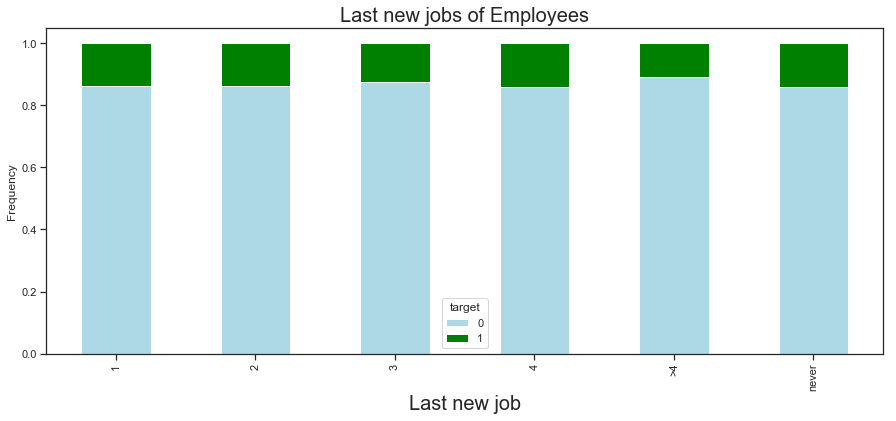

In [435]:
data = pd.crosstab(train_data['last_new_job'], train_data['target'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 6), color = ['lightblue', 'green'])
plt.title('Last new jobs of Employees', fontsize = 20)
plt.xlabel('Last new job', fontsize = 20)
plt.ylabel('Frequency')
plt.show();

## Data Pre-Processing

##### Removing the enrollee_id column

In [12]:
train_data = train_data.drop(['enrollee_id'],axis=1) # axis = 1 is for columns
train_data.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [13]:
# saving the enrollee_Id of test data
enrollee_id = test_data['enrollee_id']

# removing the Enrollee_id from test_data
test_data = test_data.drop(['enrollee_id'],axis=1) # axis = 1 is for columns
test_data.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [14]:
# defining the test set
x_test = test_data
x_test.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

### A Base line Model for Comparison

In [15]:
# Dependent and independent variables
X = train_data.drop(['target'],axis = 1)
y = train_data["target"]
X.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69
2,city_16,0.910,Unknown,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26
4,city_100,0.887,Unknown,No relevent experience,no_enrollment,Masters,STEM,8,Unknown,Unknown,2,88


### Dummy Classifier

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
# Dummy classifier with strategy as "most_frequent"
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [18]:
y_pred = dummy_clf.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
dummy_clf.score(X, y)

0.867912195653358

This is our base model, our "real" model must perform better than this

### One Hot Encoding

#### Test Data

In [20]:
x_test = pd.get_dummies(x_test)
x_test.columns

Index(['city_development_index', 'training_hours', 'city_city_1',
       'city_city_10', 'city_city_100', 'city_city_101', 'city_city_102',
       'city_city_103', 'city_city_104', 'city_city_105',
       ...
       'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'company_type_Unknown', 'last_new_job_1',
       'last_new_job_2', 'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object', length=190)

#### Train Data

In [21]:
# splitting the train set into dependent and independent sets
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
print(f"Shape of x:", {x.shape})
print(f"Shape of y:" ,{y.shape})

Shape of x: {(18359, 12)}
Shape of y: {(18359,)}


In [22]:
# one hot encoding for the train set
x = pd.get_dummies(x)
x.columns

Index(['city_development_index', 'training_hours', 'city_city_1',
       'city_city_10', 'city_city_100', 'city_city_101', 'city_city_102',
       'city_city_103', 'city_city_104', 'city_city_105',
       ...
       'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'company_type_Unknown', 'last_new_job_1',
       'last_new_job_2', 'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object', length=190)

### Oversampling 

In [23]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [24]:
x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (31868, 190)
Size of y-sample : (31868, 1)


### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_valid, y_train, y_valid = train_test_split(x_sample,y_sample, test_size = 0.2, random_state = 5)

In [27]:
print(f"Shape of x_train is: {x_train.shape}")
print(f"Shape of x_valid is: {x_valid.shape}")
print(f"Shape of x_train is: {y_train.shape}")
print(f"Shape of y_valid is: {y_valid.shape}")

Shape of x_train is: (25494, 190)
Shape of x_valid is: (6374, 190)
Shape of x_train is: (25494, 1)
Shape of y_valid is: (6374, 1)


In [35]:
x_train_csv =  pd.DataFrame(x_train.to_csv('x_train.csv'))
# x_test_csv  =  pd.DataFrame(x_test.to_csv('x_test.csv'))
x_valid_csv =  pd.DataFrame(x_valid.to_csv('x_valid.csv'))
y_yrain_csv =  pd.DataFrame(y_train.to_csv('y_train.csv'))
y_valid_csv =  pd.DataFrame(y_valid.to_csv('y_valid.csv'))

### Standard Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

## Model Building 

### Random Forest Classifier

In [480]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

In [482]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [483]:
rfc_pred = rfc.predict(x_test) # Predicting on x_test 

In [485]:
print(f"Training Accuracy : {rfc.score(x_train, y_train)}")
print(f"Validation Accuracy : {rfc.score(x_valid, y_valid)}")

Training Accuracy : 0.9996469757590021
Validation Accuracy : 0.9097897709444619


In [491]:
rfc_pred_valid = rfc.predict(x_valid) # Predicting on x_valid

In [487]:
def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                           labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [489]:
from sklearn import metrics

In [492]:
model_performance_metrics(true_labels=y_valid, predicted_labels=rfc_pred_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.95      0.86      0.91      3201
           0       0.87      0.96      0.91      3173

    accuracy                           0.91      6374
   macro avg       0.91      0.91      0.91      6374
weighted avg       0.91      0.91      0.91      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2766   435
        0        140  3033


### XG Boost Classifier

In [61]:
from xgboost.sklearn import XGBClassifier

In [495]:
xgb = XGBClassifier()

In [496]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [497]:
xgb_pred = xgb.predict(x_test)
xgb_pred_valid = xgb.predict(x_valid)

In [498]:
print(f"Training Accuracy: {xgb.score(x_train,y_train)}")
print(f"Validation Accuracy: {xgb.score(x_valid,y_valid)}")

Training Accuracy: 0.9408488271750216
Validation Accuracy: 0.9132412927518042


In [501]:
model_performance_metrics(true_labels=y_valid, predicted_labels=xgb_pred_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.97      0.85      0.91      3201
           0       0.87      0.97      0.92      3173

    accuracy                           0.91      6374
   macro avg       0.92      0.91      0.91      6374
weighted avg       0.92      0.91      0.91      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2734   467
        0         86  3087


### Light Gradient Boosting Classifier

In [38]:
from lightgbm import LGBMClassifier

In [561]:
lgb = LGBMClassifier()

In [504]:
lgb.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [505]:
lgb_pred = lgb.predict(x_test)
lgb_pred_valid = lgb.predict(x_valid)

In [507]:
print(f"Training Accuracy: {lgb.score(x_train,y_train)}")
print(f"Validation Accuracy: {lgb.score(x_valid,y_valid)}")

Training Accuracy: 0.9255118851494469
Validation Accuracy: 0.9170065892689049


In [508]:
model_performance_metrics(true_labels=y_valid, predicted_labels=lgb_pred_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.99      0.84      0.91      3201
           0       0.86      0.99      0.92      3173

    accuracy                           0.92      6374
   macro avg       0.93      0.92      0.92      6374
weighted avg       0.93      0.92      0.92      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2704   497
        0         32  3141


### Extra Trees Classifier

In [509]:
from sklearn.ensemble import ExtraTreesClassifier

In [510]:
etc = ExtraTreesClassifier()

In [511]:
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [513]:
etc_pred = etc.predict(x_test)
etc_pred_valid = etc.predict(x_valid)

In [514]:
print(f"Training Accuracy: {etc.score(x_train,y_train)}")
print(f"Validation Accuracy: {etc.score(x_valid,y_valid)}")

Training Accuracy: 0.9996469757590021
Validation Accuracy: 0.9057106997176028


In [515]:
model_performance_metrics(true_labels=y_valid, predicted_labels = etc_pred_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.95      0.86      0.90      3201
           0       0.87      0.95      0.91      3173

    accuracy                           0.91      6374
   macro avg       0.91      0.91      0.91      6374
weighted avg       0.91      0.91      0.91      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2757   444
        0        157  3016


### Model Stacking

In [516]:
# defining the stacked predictions
stacked_predictions = np.column_stack((rfc_pred, xgb_pred, lgb_pred))

In [527]:
stacked_predictions.shape
stacked_predictions[:4]

(15021, 3)

array([[1, 1, 0],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0]], dtype=int64)

In [534]:
# # specifyinng the meta model
# meta_model = RandomForestClassifier()
# meta_model.fit(stacked_predictions, )

### Ensemble Learning - Boosted Prediction

In [536]:
boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2 + lgb_pred*0.4 + etc_pred*0.3
# Higher weight to LGB classifier

In [538]:
boosted_predictions_valid = rfc_pred_valid*0.2 + xgb_pred_valid*0.2 + lgb_pred_valid*0.4 + etc_pred_valid*0.3
apc = average_precision_score(y_valid, boosted_predictions_valid)
print("Average Precision Score :", apc)

Average Precision Score : 0.9320970383032153


### Final Submission

In [539]:
submission = pd.read_csv('sample_submission_sxfcbdx.csv')
submission.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0


In [541]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}
submission = pd.DataFrame({'enrollee_id':enrollee_id, 'target': boosted_predictions})
submission.head()

,enrollee_id,target
0,16548,0.7
1,12036,0.0
2,11061,0.6
3,5032,0.0
4,17599,0.0


In [543]:
submission.to_csv('sample_submission.csv')

## Misc Exercise

In [544]:
submission_2 = pd.DataFrame({'enrollee_id': enrollee_id, 'target':lgb_pred})
submission_2.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,1
3,5032,0
4,17599,0


In [545]:
submission_2.to_csv('sample_submission_2.csv', index = False)
# only on lgb we get less score/accruacy

## Hyperparameter Tuning

### LGB Model

In [49]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_valid,y_valid)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

### Set up HyperParameter search

In [43]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [44]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [556]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 50

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [563]:
#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [564]:
gs.fit(x_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.937222
Early stopping, best iteration is:
[163]	valid's auc: 0.93844
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.93814
[200]	valid's auc: 0.93987
Early stopping, best iteration is:
[196]	valid's auc: 0.939948
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.938126
[200]	valid's auc: 0.94021
[300]	valid's auc: 0.940561
Early stopping, best iteration is:
[275]	valid's auc: 0.94068
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.93967
[200]	valid's auc: 0.940737
[300]	valid's auc: 0.941188
[400]	valid's auc: 0.94165
Early stopping, best iteration is:
[412]	valid's auc: 0.94171
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.939977
[200]	valid's auc: 0.941262
[300]	valid's auc: 0.941599
Early stopping, best iteration is:
[321]	valid's auc: 0.941644
Training until validatio

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.6min finished


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.944564
[200]	valid's auc: 0.945728
Early stopping, best iteration is:
[214]	valid's auc: 0.945937


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            metric='None', min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=1000, n_jobs=4,
                                            num_leaves=31, objective=None,
                                            random_state=314, reg_alpha=0.0,
                                            reg_la...
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017F825355

Best score reached: 0.947457510984329 with params: {'colsample_bytree': 0.6847074798584072, 'min_child_samples': 125, 'min_child_weight': 10.0, 'num_leaves': 49, 'reg_alpha': 5, 'reg_lambda': 50, 'subsample': 0.20892704149103666} 


In [568]:
opt_parameters = {'colsample_bytree': 0.6847074798584072, 'min_child_samples': 125, 'min_child_weight': 10.0,
                  'num_leaves': 49, 'reg_alpha': 5, 'reg_lambda': 50, 'subsample': 0.20892704149103666}

In [566]:
#Configure locally from hardcoded values
clf_final = LGBMClassifier(**clf.get_params())

In [569]:
#set optimal parameters
clf_final.set_params(**opt_parameters)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.6847074798584072, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='None',
               min_child_samples=125, min_child_weight=10.0, min_split_gain=0.0,
               n_estimators=1000, n_jobs=4, num_leaves=49, objective=None,
               random_state=314, reg_alpha=5, reg_lambda=50, silent=True,
               subsample=0.20892704149103666, subsample_for_bin=200000,
               subsample_freq=0)

In [571]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [575]:
#Train the final model with learning rate decay
clf_final.fit(x_train, y_train, **fit_params)

Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.944564
[200]	valid's auc: 0.945728
Early stopping, best iteration is:
[214]	valid's auc: 0.945937


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.6847074798584072, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='None',
               min_child_samples=125, min_child_weight=10.0, min_split_gain=0.0,
               n_estimators=1000, n_jobs=4, num_leaves=49, objective=None,
               random_state=314, reg_alpha=5, reg_lambda=50, silent=True,
               subsample=0.20892704149103666, subsample_for_bin=200000,
               subsample_freq=0)

In [578]:
lgb_hp_pred_test = clf_final.predict(x_test)

In [579]:
submission_3 = pd.DataFrame({'enrollee_id': enrollee_id, 'target':lgb_hp_pred_test})
submission_3.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,1
3,5032,0
4,17599,0


In [581]:
submission_3.to_csv('sample_submission_3.csv',index=False)

### XGB Model

In [584]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [585]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x17f8e5b8cc0>,
 'gamma': <hyperopt.pyll.base.Apply at 0x17f8e5b8e10>,
 'reg_alpha': <hyperopt.pyll.base.Apply at 0x17f8e5b8f98>,
 'reg_lambda': <hyperopt.pyll.base.Apply at 0x17f8e5be128>,
 'colsample_bytree': <hyperopt.pyll.base.Apply at 0x17f8e5be278>,
 'min_child_weight': <hyperopt.pyll.base.Apply at 0x17f8e5be400>,
 'n_estimators': 180,
 'seed': 0}

In [595]:
from sklearn.metrics import accuracy_score

In [598]:
def objective(space):
    clf = XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), (x_valid, y_valid)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    
    pred = clf.predict(x_valid)
    accuracy = accuracy_score(y_valid, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [599]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.5872293693128334
SCORE:
0.7433322874176341
SCORE:
0.5709130844053969
SCORE:
0.7169752117979291
SCORE:
0.7138374647003451
SCORE:
0.7481957954188893
SCORE:
0.7205836209601506
SCORE:
0.7143081267649828
SCORE:
0.7139943520552243
SCORE:
0.5786005647944775
SCORE:
0.7339190461248823
SCORE:
0.7483526827737684
SCORE:
0.5872293693128334
SCORE:
0.7127392532161908
SCORE:
0.5786005647944775
SCORE:
0.5709130844053969
SCORE:
0.5786005647944775
SCORE:
0.5709130844053969
SCORE:
0.7401945403200502
SCORE:
0.7190147474113586
SCORE:
0.7085032946344525
SCORE:
0.7499215563225604
SCORE:
0.7486664574835268
SCORE:
0.7361154690931911
SCORE:
0.7496077816128021
SCORE:
0.5944461876372764
SCORE:
0.7420771885786006
SCORE:
0.7318795105114527
SCORE:
0.7111703796673988
SCORE:
0.7511766551615939
SCORE:
0.7215249450894258
SCORE:
0.7450580483213053
SCORE:
0.7325070599309695
SCORE:
0.7442736115469093
SCORE:
0.711327267022278
SCORE:
0.720897395669909
SCORE:
0.7268591151553185
SCORE:
0.7358016943834327
SCORE:
0.74725

In [600]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8883735689829799, 'gamma': 1.9384497663707005, 'max_depth': 8.0, 'min_child_weight': 4.0, 'reg_alpha': 40.0, 'reg_lambda': 0.23533468159820195}


In [605]:
xgb_hp =  XGBClassifier(learning_rate =0.1, colsample_bytree = 0.8883735689829799,gamma = 1.9384497663707005, max_depth=8,
       min_child_weight = 4.0,reg_alpha = 40.0, reg_lambda = 0.23533468159820195)

type(xgb_hp)
xgb_hp

xgboost.sklearn.XGBClassifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8883735689829799,
              gamma=1.9384497663707005, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.1,
              max_delta_step=None, max_depth=8, min_child_weight=4.0,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='binary:logistic',
              random_state=None, reg_alpha=40.0, reg_lambda=0.23533468159820195,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=False, verbosity=None)

In [606]:
xgb_hp.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8883735689829799,
              gamma=1.9384497663707005, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=4.0, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=40.0, reg_lambda=0.23533468159820195,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [609]:
xgb_pred_hp = xgb_hp.predict(x_test)
xgb_pred_hp_valid = xgb_hp.predict(x_valid)

In [611]:
# print(f"Training Accuracy: {xgb_pred_hp.score(x_train,y_train)}")
# print(f"Validation Accuracy: {xgb_pred_hp_valid.score(x_valid,y_valid)}")

In [612]:
model_performance_metrics(true_labels=y_valid, predicted_labels=xgb_pred_hp_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.9
Precision: 0.91
Recall: 0.9
F1 Score: 0.9
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.97      0.82      0.89      3201
           0       0.84      0.98      0.90      3173

    accuracy                           0.90      6374
   macro avg       0.91      0.90      0.90      6374
weighted avg       0.91      0.90      0.90      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2616   585
        0         71  3102


In [614]:
submission_4 = pd.DataFrame({'enrollee_id':enrollee_id, 'target':xgb_pred_hp})
submission_4.to_csv('sample_submission_4.csv',index = False)

In [615]:
xgb_cj =  XGBClassifier(learning_rate =0.1,reg_alpha=0.006, n_estimators=125, max_depth=3,
 min_child_weight=12, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=13)
type(xgb_cj)
xgb_cj

xgboost.sklearn.XGBClassifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0.1,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=None, nthread=4, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=0.006,
              reg_lambda=None, scale_pos_weight=1, seed=13, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [616]:
xgb_cj.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=13, reg_alpha=0.006,
              reg_lambda=1, scale_pos_weight=1, seed=13, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [619]:
xgb_pred_cj = xgb_cj.predict(x_test)
xgb_pred_cj_valid = xgb_cj.predict(x_valid)

In [621]:
model_performance_metrics(true_labels=y_valid, predicted_labels=xgb_pred_cj_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1 Score: 0.88
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.92      0.84      0.88      3201
           0       0.85      0.92      0.89      3173

    accuracy                           0.88      6374
   macro avg       0.89      0.88      0.88      6374
weighted avg       0.89      0.88      0.88      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2704   497
        0        244  2929


In [622]:
submission_5 = pd.DataFrame({'enrollee_id':enrollee_id, 'target':xgb_pred_cj})
submission_5.to_csv('sample_submission_5.csv',index = False)

## Sample_Submission_5 is the highest

In [623]:
xgb_lr =  XGBClassifier(learning_rate =0.05,reg_alpha=0.006, n_estimators=125, max_depth=3,
 min_child_weight=12, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=13)
type(xgb_lr)
# xgb_lr

xgboost.sklearn.XGBClassifier

In [625]:
xgb_lr.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=13, reg_alpha=0.006,
              reg_lambda=1, scale_pos_weight=1, seed=13, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [626]:
xgb_lr_pred = xgb_lr.predict(x_test)
xgb_lr_pred_valid = xgb_lr.predict(x_valid)

In [627]:
model_performance_metrics(true_labels=y_valid, predicted_labels=xgb_lr_pred_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.87      0.84      0.85      3201
           0       0.84      0.87      0.86      3173

    accuracy                           0.85      6374
   macro avg       0.85      0.85      0.85      6374
weighted avg       0.85      0.85      0.85      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2692   509
        0        419  2754


In [628]:
submission_6 = pd.DataFrame({'enrollee_id':enrollee_id, 'target':xgb_lr_pred})
submission_6.to_csv('sample_submission_6.csv',index = False)
## Sample_Submission_6 is the highest

In [629]:
xgb_lr_1 =  XGBClassifier(learning_rate =0.03,reg_alpha=0.006, n_estimators=125, max_depth=3,
 min_child_weight=12, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=13)
type(xgb_lr_1)
# xgb_lr

xgboost.sklearn.XGBClassifier

In [630]:
xgb_lr_1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=13, reg_alpha=0.006,
              reg_lambda=1, scale_pos_weight=1, seed=13, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [631]:
xgb_lr_1_pred = xgb_lr_1.predict(x_test)
xgb_lr_1_pred_valid = xgb_lr_1.predict(x_valid)

In [632]:
model_performance_metrics(true_labels=y_valid, predicted_labels=xgb_lr_1_pred_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.81      0.83      0.82      3201
           0       0.82      0.81      0.82      3173

    accuracy                           0.82      6374
   macro avg       0.82      0.82      0.82      6374
weighted avg       0.82      0.82      0.82      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2657   544
        0        616  2557


In [634]:
submission_7 = pd.DataFrame({'enrollee_id':enrollee_id, 'target':xgb_lr_1_pred})
submission_7.to_csv('sample_submission_7.csv',index = False)
## Sample_Submission_7 is the highest

### Highest Submission till date

In [636]:
xgb_lr_2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=13, reg_alpha=0.006,
              reg_lambda=1, scale_pos_weight=1, seed=13, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [637]:
xgb_lr_2_pred = xgb_lr_2.predict(x_test)
xgb_lr_2_pred_valid = xgb_lr_2.predict(x_valid)

In [638]:
model_performance_metrics(true_labels=y_valid, predicted_labels=xgb_lr_2_pred_valid, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.73      0.79      0.76      3201
           0       0.77      0.71      0.74      3173

    accuracy                           0.75      6374
   macro avg       0.75      0.75      0.75      6374
weighted avg       0.75      0.75      0.75      6374

Prediction Confusion Matrix:
**********************************************************************
          Predicted:      
                   1     0
Actual: 1       2516   685
        0        931  2242


In [639]:
submission_8 = pd.DataFrame({'enrollee_id':enrollee_id, 'target':xgb_lr_2_pred})
submission_8.to_csv('sample_submission_8.csv',index = False)
## Sample_Submission_8 is the highest till date 14-June-2020

In [94]:
xgb_lr_3 =  XGBClassifier(learning_rate =0.01,reg_alpha=0.006, n_estimators=200, max_depth=3,
 min_child_weight=12, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=13)
type(xgb_lr_3)
# xgb_lr

xgboost.sklearn.XGBClassifier

In [95]:
xgb_lr_3.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=13, reg_alpha=0.006,
              reg_lambda=1, scale_pos_weight=1, seed=13, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [96]:
xgb_lr_3_pred = xgb_lr_3.predict(x_test)
xgb_lr_3_pred_valid = xgb_lr_3.predict(x_valid)

In [97]:
# model_performance_metrics(true_labels=y_valid, predicted_labels=xgb_lr_3_pred_valid, classes=[1, 0])

In [98]:
submission_9 = pd.DataFrame({'enrollee_id':enrollee_id, 'target':xgb_lr_3_pred})
submission_9.to_csv('sample_submission_9.csv',index = False)
## Sample_Submission_7 is the highest

In [46]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

In [47]:
#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf_1 = LGBMClassifier(learning_rate  = 0.01,max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

gs = RandomizedSearchCV(
    estimator=clf_1, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=315,
    verbose=True)

In [50]:
gs.fit(x_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100]	valid's auc: 0.843321
[200]	valid's auc: 0.904757
[300]	valid's auc: 0.920504
[400]	valid's auc: 0.926385
[500]	valid's auc: 0.929052
[600]	valid's auc: 0.930382
[700]	valid's auc: 0.931382
[800]	valid's auc: 0.931941
[900]	valid's auc: 0.932463
[1000]	valid's auc: 0.93293
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.93293


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.849367
[200]	valid's auc: 0.901896
[300]	valid's auc: 0.919569
[400]	valid's auc: 0.926258
[500]	valid's auc: 0.929039
[600]	valid's auc: 0.930312
[700]	valid's auc: 0.931437
[800]	valid's auc: 0.931965
[900]	valid's auc: 0.93257
[1000]	valid's auc: 0.932899
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.932905


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.85378
[200]	valid's auc: 0.905145
[300]	valid's auc: 0.920317
[400]	valid's auc: 0.926516
[500]	valid's auc: 0.929378
[600]	valid's auc: 0.930708
[700]	valid's auc: 0.931603
[800]	valid's auc: 0.932212
[900]	valid's auc: 0.93274
[1000]	valid's auc: 0.932964
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.932964


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.825758
[200]	valid's auc: 0.893978
[300]	valid's auc: 0.91392
[400]	valid's auc: 0.922254
[500]	valid's auc: 0.926256
[600]	valid's auc: 0.928692
[700]	valid's auc: 0.929838
[800]	valid's auc: 0.930674
[900]	valid's auc: 0.93122
[1000]	valid's auc: 0.931679
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.931681


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.824318
[200]	valid's auc: 0.891464
[300]	valid's auc: 0.913979
[400]	valid's auc: 0.922352
[500]	valid's auc: 0.926084
[600]	valid's auc: 0.928223
[700]	valid's auc: 0.929622
[800]	valid's auc: 0.930388
[900]	valid's auc: 0.930975
[1000]	valid's auc: 0.931508
Did not meet early stopping. Best iteration is:
[995]	valid's auc: 0.931519


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.827643
[200]	valid's auc: 0.894263
[300]	valid's auc: 0.914178
[400]	valid's auc: 0.922242
[500]	valid's auc: 0.926521
[600]	valid's auc: 0.928508
[700]	valid's auc: 0.929773
[800]	valid's auc: 0.930603
[900]	valid's auc: 0.931162
[1000]	valid's auc: 0.931462
Did not meet early stopping. Best iteration is:
[988]	valid's auc: 0.931507


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.872614
[200]	valid's auc: 0.911277
[300]	valid's auc: 0.923679
[400]	valid's auc: 0.92834
[500]	valid's auc: 0.93078
[600]	valid's auc: 0.931748
[700]	valid's auc: 0.932176
[800]	valid's auc: 0.932324
Early stopping, best iteration is:
[770]	valid's auc: 0.932337


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.875594
[200]	valid's auc: 0.912927
[300]	valid's auc: 0.924279
[400]	valid's auc: 0.928516
[500]	valid's auc: 0.930621
[600]	valid's auc: 0.931668
[700]	valid's auc: 0.932259
[800]	valid's auc: 0.932553
[900]	valid's auc: 0.932862
[1000]	valid's auc: 0.933034
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.933034


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.879815
[200]	valid's auc: 0.91081
[300]	valid's auc: 0.923557
[400]	valid's auc: 0.928068
[500]	valid's auc: 0.930338
[600]	valid's auc: 0.931502
[700]	valid's auc: 0.931944
Early stopping, best iteration is:
[722]	valid's auc: 0.932091


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.859198
[200]	valid's auc: 0.912151
[300]	valid's auc: 0.926826
[400]	valid's auc: 0.932153
[500]	valid's auc: 0.934979
[600]	valid's auc: 0.936798
[700]	valid's auc: 0.938206
[800]	valid's auc: 0.939172
[900]	valid's auc: 0.939867
[1000]	valid's auc: 0.940347
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.940347


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.856758
[200]	valid's auc: 0.911087
[300]	valid's auc: 0.927028
[400]	valid's auc: 0.931939
[500]	valid's auc: 0.93494
[600]	valid's auc: 0.936892
[700]	valid's auc: 0.93803
[800]	valid's auc: 0.938957
[900]	valid's auc: 0.93964
[1000]	valid's auc: 0.940249
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.940258


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.856595
[200]	valid's auc: 0.914777
[300]	valid's auc: 0.927744
[400]	valid's auc: 0.932598
[500]	valid's auc: 0.935528
[600]	valid's auc: 0.937359
[700]	valid's auc: 0.938433
[800]	valid's auc: 0.939092
[900]	valid's auc: 0.939671
[1000]	valid's auc: 0.940162
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.940162


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.882745
[200]	valid's auc: 0.917614
[300]	valid's auc: 0.928373
[400]	valid's auc: 0.931887
[500]	valid's auc: 0.933698
[600]	valid's auc: 0.934733
[700]	valid's auc: 0.935491
[800]	valid's auc: 0.935878
[900]	valid's auc: 0.936144
[1000]	valid's auc: 0.936363
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936363


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.884703
[200]	valid's auc: 0.918744
[300]	valid's auc: 0.92806
[400]	valid's auc: 0.931583
[500]	valid's auc: 0.933566
[600]	valid's auc: 0.934673
[700]	valid's auc: 0.935266
[800]	valid's auc: 0.935816
[900]	valid's auc: 0.93633
[1000]	valid's auc: 0.936703
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.936707


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.88473
[200]	valid's auc: 0.918189
[300]	valid's auc: 0.928256
[400]	valid's auc: 0.931992
[500]	valid's auc: 0.933644
[600]	valid's auc: 0.934589
[700]	valid's auc: 0.93527
[800]	valid's auc: 0.935759
[900]	valid's auc: 0.936258
[1000]	valid's auc: 0.936665
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.936669


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.857818
[200]	valid's auc: 0.891748
[300]	valid's auc: 0.911712
[400]	valid's auc: 0.922331
[500]	valid's auc: 0.927652
[600]	valid's auc: 0.930717
[700]	valid's auc: 0.933536
[800]	valid's auc: 0.935436
[900]	valid's auc: 0.936895
[1000]	valid's auc: 0.937851
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937851


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.851761
[200]	valid's auc: 0.892266
[300]	valid's auc: 0.911431
[400]	valid's auc: 0.920827
[500]	valid's auc: 0.927241
[600]	valid's auc: 0.930588
[700]	valid's auc: 0.933071
[800]	valid's auc: 0.935221
[900]	valid's auc: 0.936721
[1000]	valid's auc: 0.937764
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937764


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[37]	valid's auc: 0.855772


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.853991
[200]	valid's auc: 0.90724
[300]	valid's auc: 0.921833
[400]	valid's auc: 0.928136
[500]	valid's auc: 0.930697
[600]	valid's auc: 0.932181
[700]	valid's auc: 0.933171
[800]	valid's auc: 0.933782
[900]	valid's auc: 0.934272
[1000]	valid's auc: 0.934763
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.934763


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.858393
[200]	valid's auc: 0.907476
[300]	valid's auc: 0.92171
[400]	valid's auc: 0.927835
[500]	valid's auc: 0.930527
[600]	valid's auc: 0.932067
[700]	valid's auc: 0.932957
[800]	valid's auc: 0.933543
[900]	valid's auc: 0.933974
[1000]	valid's auc: 0.934348
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.934348


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.868527
[200]	valid's auc: 0.912635
[300]	valid's auc: 0.923435
[400]	valid's auc: 0.928313
[500]	valid's auc: 0.931011
[600]	valid's auc: 0.932297
[700]	valid's auc: 0.933
[800]	valid's auc: 0.933497
[900]	valid's auc: 0.933868
[1000]	valid's auc: 0.934229
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.934229


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.875162
[200]	valid's auc: 0.912913
[300]	valid's auc: 0.925775
[400]	valid's auc: 0.930182
[500]	valid's auc: 0.932683
[600]	valid's auc: 0.934257
[700]	valid's auc: 0.93495
[800]	valid's auc: 0.935341
[900]	valid's auc: 0.935633
[1000]	valid's auc: 0.935864
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.935864


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[16]	valid's auc: 0.832244


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.879955
[200]	valid's auc: 0.916178
[300]	valid's auc: 0.926272
[400]	valid's auc: 0.930252
[500]	valid's auc: 0.932512
[600]	valid's auc: 0.93379
[700]	valid's auc: 0.934653
[800]	valid's auc: 0.93515
[900]	valid's auc: 0.935505
[1000]	valid's auc: 0.935884
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.935885


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.881837
[200]	valid's auc: 0.918799
[300]	valid's auc: 0.928539
[400]	valid's auc: 0.931707
[500]	valid's auc: 0.933482
[600]	valid's auc: 0.934601
[700]	valid's auc: 0.935174
[800]	valid's auc: 0.935662
[900]	valid's auc: 0.936041
[1000]	valid's auc: 0.936297
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.936301


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.887997
[200]	valid's auc: 0.920213
[300]	valid's auc: 0.928935
[400]	valid's auc: 0.932216
[500]	valid's auc: 0.933783
[600]	valid's auc: 0.93481
[700]	valid's auc: 0.935291
[800]	valid's auc: 0.935841
[900]	valid's auc: 0.936136
[1000]	valid's auc: 0.936316
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936316


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.891425
[200]	valid's auc: 0.920803
[300]	valid's auc: 0.928994
[400]	valid's auc: 0.931704
[500]	valid's auc: 0.933285
[600]	valid's auc: 0.93432
[700]	valid's auc: 0.934894
[800]	valid's auc: 0.935368
[900]	valid's auc: 0.935629
[1000]	valid's auc: 0.935759
Did not meet early stopping. Best iteration is:
[979]	valid's auc: 0.935765


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.884854
[200]	valid's auc: 0.920996
[300]	valid's auc: 0.931232
[400]	valid's auc: 0.934257
[500]	valid's auc: 0.935528
[600]	valid's auc: 0.936136
[700]	valid's auc: 0.936661
[800]	valid's auc: 0.937009
[900]	valid's auc: 0.937253
[1000]	valid's auc: 0.937439
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.937449


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.892372
[200]	valid's auc: 0.92168
[300]	valid's auc: 0.929739
[400]	valid's auc: 0.932962
[500]	valid's auc: 0.934306
[600]	valid's auc: 0.935333
[700]	valid's auc: 0.936076
[800]	valid's auc: 0.936421
[900]	valid's auc: 0.936822
[1000]	valid's auc: 0.937073
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937073


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.895298
[200]	valid's auc: 0.925959
[300]	valid's auc: 0.933415
[400]	valid's auc: 0.935736
[500]	valid's auc: 0.936698
[600]	valid's auc: 0.937329
[700]	valid's auc: 0.937662
[800]	valid's auc: 0.938064
[900]	valid's auc: 0.938387
[1000]	valid's auc: 0.938664
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.938664


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.913573
[200]	valid's auc: 0.940313
[300]	valid's auc: 0.944048
[400]	valid's auc: 0.944668
[500]	valid's auc: 0.944961
Early stopping, best iteration is:
[472]	valid's auc: 0.945006


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.919633
[200]	valid's auc: 0.939991
[300]	valid's auc: 0.943075
[400]	valid's auc: 0.944073
[500]	valid's auc: 0.94447
Early stopping, best iteration is:
[514]	valid's auc: 0.944557


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.921256
[200]	valid's auc: 0.938995
[300]	valid's auc: 0.941839
[400]	valid's auc: 0.942897
[500]	valid's auc: 0.943407
[600]	valid's auc: 0.943805
[700]	valid's auc: 0.943985
Early stopping, best iteration is:
[699]	valid's auc: 0.943995


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.862702
[200]	valid's auc: 0.904991
[300]	valid's auc: 0.922053
[400]	valid's auc: 0.930633
[500]	valid's auc: 0.934977
[600]	valid's auc: 0.937353
[700]	valid's auc: 0.93849
[800]	valid's auc: 0.939374
[900]	valid's auc: 0.940113
[1000]	valid's auc: 0.940583
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.940583


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.863952
[200]	valid's auc: 0.904403
[300]	valid's auc: 0.922507
[400]	valid's auc: 0.931413
[500]	valid's auc: 0.935333
[600]	valid's auc: 0.937295
[700]	valid's auc: 0.93852
[800]	valid's auc: 0.939332
[900]	valid's auc: 0.939976
[1000]	valid's auc: 0.940483
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.940483


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.869809
[200]	valid's auc: 0.90583
[300]	valid's auc: 0.923838
[400]	valid's auc: 0.931448
[500]	valid's auc: 0.934708
[600]	valid's auc: 0.936754
[700]	valid's auc: 0.938109
[800]	valid's auc: 0.938925
[900]	valid's auc: 0.939498
[1000]	valid's auc: 0.939784
Did not meet early stopping. Best iteration is:
[996]	valid's auc: 0.939795


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.836363
[200]	valid's auc: 0.895626
[300]	valid's auc: 0.911953
[400]	valid's auc: 0.919487
[500]	valid's auc: 0.923831
[600]	valid's auc: 0.926207
[700]	valid's auc: 0.927817
[800]	valid's auc: 0.928932
[900]	valid's auc: 0.929842
[1000]	valid's auc: 0.930636
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930636


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.838427
[200]	valid's auc: 0.894899
[300]	valid's auc: 0.912275
[400]	valid's auc: 0.920272
[500]	valid's auc: 0.924607
[600]	valid's auc: 0.927072
[700]	valid's auc: 0.928603
[800]	valid's auc: 0.929725
[900]	valid's auc: 0.930652
[1000]	valid's auc: 0.931315
Did not meet early stopping. Best iteration is:
[997]	valid's auc: 0.931316


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.846204
[200]	valid's auc: 0.895347
[300]	valid's auc: 0.913955
[400]	valid's auc: 0.921142
[500]	valid's auc: 0.924873
[600]	valid's auc: 0.927129
[700]	valid's auc: 0.928569
[800]	valid's auc: 0.929489
[900]	valid's auc: 0.930202
[1000]	valid's auc: 0.930796
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930796


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.879703
[200]	valid's auc: 0.910647
[300]	valid's auc: 0.922892
[400]	valid's auc: 0.928299
[500]	valid's auc: 0.930256
[600]	valid's auc: 0.931388
[700]	valid's auc: 0.932279
[800]	valid's auc: 0.932749
[900]	valid's auc: 0.932883
[1000]	valid's auc: 0.933014
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.933014


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.884001
[200]	valid's auc: 0.911246
[300]	valid's auc: 0.923368
[400]	valid's auc: 0.928082
[500]	valid's auc: 0.930709
[600]	valid's auc: 0.931757
[700]	valid's auc: 0.932436
[800]	valid's auc: 0.93286
[900]	valid's auc: 0.933211
[1000]	valid's auc: 0.93342
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.933426


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.879831
[200]	valid's auc: 0.911376
[300]	valid's auc: 0.922231
[400]	valid's auc: 0.927545
[500]	valid's auc: 0.929854
[600]	valid's auc: 0.931184
[700]	valid's auc: 0.931935
[800]	valid's auc: 0.9322
Early stopping, best iteration is:
[823]	valid's auc: 0.932258


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.872956
[200]	valid's auc: 0.898889
[300]	valid's auc: 0.91661
[400]	valid's auc: 0.925707
[500]	valid's auc: 0.930384
[600]	valid's auc: 0.933551
[700]	valid's auc: 0.935358
[800]	valid's auc: 0.936379
[900]	valid's auc: 0.937108
[1000]	valid's auc: 0.937671
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937671


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.878637
[200]	valid's auc: 0.901352
[300]	valid's auc: 0.917929
[400]	valid's auc: 0.926731
[500]	valid's auc: 0.931054
[600]	valid's auc: 0.933804
[700]	valid's auc: 0.935333
[800]	valid's auc: 0.936394
[900]	valid's auc: 0.937123
[1000]	valid's auc: 0.937651
Did not meet early stopping. Best iteration is:
[997]	valid's auc: 0.937663


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.879204
[200]	valid's auc: 0.903391
[300]	valid's auc: 0.919411
[400]	valid's auc: 0.927114
[500]	valid's auc: 0.931329
[600]	valid's auc: 0.933445
[700]	valid's auc: 0.935165
[800]	valid's auc: 0.936375
[900]	valid's auc: 0.937087
[1000]	valid's auc: 0.937649
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937649


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.891054
[200]	valid's auc: 0.914207
[300]	valid's auc: 0.927462
[400]	valid's auc: 0.933429
[500]	valid's auc: 0.936364
[600]	valid's auc: 0.937778
[700]	valid's auc: 0.938816
[800]	valid's auc: 0.939216
[900]	valid's auc: 0.939626
[1000]	valid's auc: 0.940026
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.940026


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.890947
[200]	valid's auc: 0.914975
[300]	valid's auc: 0.926296
[400]	valid's auc: 0.932137
[500]	valid's auc: 0.935476
[600]	valid's auc: 0.936929
[700]	valid's auc: 0.938151
[800]	valid's auc: 0.938575
[900]	valid's auc: 0.939037
[1000]	valid's auc: 0.93949
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.939495


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.892549
[200]	valid's auc: 0.915075
[300]	valid's auc: 0.927487
[400]	valid's auc: 0.932952
[500]	valid's auc: 0.935795
[600]	valid's auc: 0.937191
[700]	valid's auc: 0.93822
[800]	valid's auc: 0.938842
[900]	valid's auc: 0.93923
[1000]	valid's auc: 0.939669
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.939669


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.845474
[200]	valid's auc: 0.89087
[300]	valid's auc: 0.911541
[400]	valid's auc: 0.920245
[500]	valid's auc: 0.923979
[600]	valid's auc: 0.926502
[700]	valid's auc: 0.927958
[800]	valid's auc: 0.928878
[900]	valid's auc: 0.929503
[1000]	valid's auc: 0.929993
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.929994


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.843456
[200]	valid's auc: 0.896089
[300]	valid's auc: 0.913825
[400]	valid's auc: 0.921512
[500]	valid's auc: 0.925437
[600]	valid's auc: 0.927871
[700]	valid's auc: 0.928904
[800]	valid's auc: 0.929598
[900]	valid's auc: 0.930253
[1000]	valid's auc: 0.930559
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930559


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[4]	valid's auc: 0.798686


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.832131
[200]	valid's auc: 0.872674
[300]	valid's auc: 0.898438
[400]	valid's auc: 0.910502
[500]	valid's auc: 0.917988
[600]	valid's auc: 0.923139
[700]	valid's auc: 0.926094
[800]	valid's auc: 0.928247
[900]	valid's auc: 0.929739
[1000]	valid's auc: 0.930772
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930772


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.830132
[200]	valid's auc: 0.870943
[300]	valid's auc: 0.896735
[400]	valid's auc: 0.909499
[500]	valid's auc: 0.917211
[600]	valid's auc: 0.922579
[700]	valid's auc: 0.926128
[800]	valid's auc: 0.928262
[900]	valid's auc: 0.929693
[1000]	valid's auc: 0.930831
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930831


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.835508
[200]	valid's auc: 0.874518
[300]	valid's auc: 0.898735
[400]	valid's auc: 0.911772
[500]	valid's auc: 0.918859
[600]	valid's auc: 0.923418
[700]	valid's auc: 0.926367
[800]	valid's auc: 0.928378
[900]	valid's auc: 0.929739
[1000]	valid's auc: 0.930763
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930763


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[18]	valid's auc: 0.664202


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	valid's auc: 0.662906


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[18]	valid's auc: 0.664202


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.907596
[200]	valid's auc: 0.92929
[300]	valid's auc: 0.938004
[400]	valid's auc: 0.940746
[500]	valid's auc: 0.941876
[600]	valid's auc: 0.942398
[700]	valid's auc: 0.942854
[800]	valid's auc: 0.943158
Early stopping, best iteration is:
[811]	valid's auc: 0.943194


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.90758
[200]	valid's auc: 0.931026
[300]	valid's auc: 0.938446
[400]	valid's auc: 0.940813
[500]	valid's auc: 0.942285
[600]	valid's auc: 0.943323
[700]	valid's auc: 0.94408
[800]	valid's auc: 0.94458
[900]	valid's auc: 0.944966
[1000]	valid's auc: 0.94518
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.945185


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.9063
[200]	valid's auc: 0.930395
[300]	valid's auc: 0.937788
[400]	valid's auc: 0.940073
[500]	valid's auc: 0.941151
[600]	valid's auc: 0.94194
[700]	valid's auc: 0.942405
[800]	valid's auc: 0.942704
[900]	valid's auc: 0.942948
[1000]	valid's auc: 0.94314
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.94314


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[8]	valid's auc: 0.854346


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[8]	valid's auc: 0.851555


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.916023
[200]	valid's auc: 0.934114
[300]	valid's auc: 0.93846
[400]	valid's auc: 0.939952
[500]	valid's auc: 0.940384
[600]	valid's auc: 0.940876
[700]	valid's auc: 0.941208
[800]	valid's auc: 0.941437
[900]	valid's auc: 0.941539
[1000]	valid's auc: 0.941702
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.941702


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.892374
[200]	valid's auc: 0.923792
[300]	valid's auc: 0.930829
[400]	valid's auc: 0.93338
[500]	valid's auc: 0.934477
[600]	valid's auc: 0.935228
[700]	valid's auc: 0.93585
[800]	valid's auc: 0.936255
[900]	valid's auc: 0.936587
[1000]	valid's auc: 0.936844
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.936848


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.89788
[200]	valid's auc: 0.924375
[300]	valid's auc: 0.930175
[400]	valid's auc: 0.932719
[500]	valid's auc: 0.934042
[600]	valid's auc: 0.934834
[700]	valid's auc: 0.935745
[800]	valid's auc: 0.936302
[900]	valid's auc: 0.936747
[1000]	valid's auc: 0.937289
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937289


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.90116
[200]	valid's auc: 0.92512
[300]	valid's auc: 0.930635
[400]	valid's auc: 0.933161
[500]	valid's auc: 0.934441
[600]	valid's auc: 0.935322
[700]	valid's auc: 0.935927
[800]	valid's auc: 0.936463
[900]	valid's auc: 0.936975
[1000]	valid's auc: 0.937415
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937415


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.776466
[200]	valid's auc: 0.847078
[300]	valid's auc: 0.87676
[400]	valid's auc: 0.889234
[500]	valid's auc: 0.897423
[600]	valid's auc: 0.901728
[700]	valid's auc: 0.904716
[800]	valid's auc: 0.907462
[900]	valid's auc: 0.909432
[1000]	valid's auc: 0.911009
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.911009


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.778636
[200]	valid's auc: 0.850229
[300]	valid's auc: 0.873471
[400]	valid's auc: 0.885787
[500]	valid's auc: 0.893985
[600]	valid's auc: 0.899546
[700]	valid's auc: 0.903354
[800]	valid's auc: 0.905912
[900]	valid's auc: 0.90775
[1000]	valid's auc: 0.909547
Did not meet early stopping. Best iteration is:
[996]	valid's auc: 0.909555


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.780621
[200]	valid's auc: 0.853769
[300]	valid's auc: 0.876055
[400]	valid's auc: 0.8905
[500]	valid's auc: 0.89817
[600]	valid's auc: 0.902511
[700]	valid's auc: 0.905472
[800]	valid's auc: 0.908221
[900]	valid's auc: 0.910446
[1000]	valid's auc: 0.91177
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.91177


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.875484
[200]	valid's auc: 0.912425
[300]	valid's auc: 0.925153
[400]	valid's auc: 0.930628
[500]	valid's auc: 0.933038
[600]	valid's auc: 0.934578
[700]	valid's auc: 0.935233
[800]	valid's auc: 0.935781
[900]	valid's auc: 0.936208
[1000]	valid's auc: 0.936652
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936652


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.878004
[200]	valid's auc: 0.912437
[300]	valid's auc: 0.924777
[400]	valid's auc: 0.930024
[500]	valid's auc: 0.932526
[600]	valid's auc: 0.933911
[700]	valid's auc: 0.934787
[800]	valid's auc: 0.935613
[900]	valid's auc: 0.93631
[1000]	valid's auc: 0.936639
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936639


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.878401
[200]	valid's auc: 0.914637
[300]	valid's auc: 0.925468
[400]	valid's auc: 0.93038
[500]	valid's auc: 0.932984
[600]	valid's auc: 0.934457
[700]	valid's auc: 0.935198
[800]	valid's auc: 0.935916
[900]	valid's auc: 0.936346
[1000]	valid's auc: 0.936829
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936829


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.830144
[200]	valid's auc: 0.85815
[300]	valid's auc: 0.879464
[400]	valid's auc: 0.896459
[500]	valid's auc: 0.905174
[600]	valid's auc: 0.911642
[700]	valid's auc: 0.915574
[800]	valid's auc: 0.918499
[900]	valid's auc: 0.920932
[1000]	valid's auc: 0.922768
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.922768


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.822501
[200]	valid's auc: 0.85563
[300]	valid's auc: 0.878308
[400]	valid's auc: 0.895251
[500]	valid's auc: 0.90438
[600]	valid's auc: 0.910699
[700]	valid's auc: 0.915183
[800]	valid's auc: 0.917872
[900]	valid's auc: 0.920455
[1000]	valid's auc: 0.922319
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.922324


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.832365
[200]	valid's auc: 0.860731
[300]	valid's auc: 0.882516
[400]	valid's auc: 0.89731
[500]	valid's auc: 0.905749
[600]	valid's auc: 0.911999
[700]	valid's auc: 0.916379
[800]	valid's auc: 0.919465
[900]	valid's auc: 0.921606
[1000]	valid's auc: 0.923152
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.923152


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.895594
[200]	valid's auc: 0.921908
[300]	valid's auc: 0.930013
[400]	valid's auc: 0.932691
[500]	valid's auc: 0.934117
[600]	valid's auc: 0.934916
[700]	valid's auc: 0.935491
[800]	valid's auc: 0.935903
[900]	valid's auc: 0.93627
[1000]	valid's auc: 0.93658
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.936593


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.897502
[200]	valid's auc: 0.922926
[300]	valid's auc: 0.930455
[400]	valid's auc: 0.933178
[500]	valid's auc: 0.934927
[600]	valid's auc: 0.935825
[700]	valid's auc: 0.936432
[800]	valid's auc: 0.937018
[900]	valid's auc: 0.937376
[1000]	valid's auc: 0.937738
Did not meet early stopping. Best iteration is:
[996]	valid's auc: 0.937738


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.896017
[200]	valid's auc: 0.923143
[300]	valid's auc: 0.930304
[400]	valid's auc: 0.933155
[500]	valid's auc: 0.934512
[600]	valid's auc: 0.935336
[700]	valid's auc: 0.935922
[800]	valid's auc: 0.936354
[900]	valid's auc: 0.936658
[1000]	valid's auc: 0.93715
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.93715


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.897679
[200]	valid's auc: 0.929043
[300]	valid's auc: 0.937337
[400]	valid's auc: 0.939276
[500]	valid's auc: 0.939891
[600]	valid's auc: 0.940332
[700]	valid's auc: 0.940528
[800]	valid's auc: 0.940838
Early stopping, best iteration is:
[800]	valid's auc: 0.940838


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.905196
[200]	valid's auc: 0.930852
[300]	valid's auc: 0.93626
[400]	valid's auc: 0.937936
[500]	valid's auc: 0.939061
[600]	valid's auc: 0.93973
[700]	valid's auc: 0.940132
[800]	valid's auc: 0.940389
[900]	valid's auc: 0.940796
[1000]	valid's auc: 0.940948
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.940952


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.908823
[200]	valid's auc: 0.931387
[300]	valid's auc: 0.937018
[400]	valid's auc: 0.938874
[500]	valid's auc: 0.939719
[600]	valid's auc: 0.940153
[700]	valid's auc: 0.940743
[800]	valid's auc: 0.941028
[900]	valid's auc: 0.941318
[1000]	valid's auc: 0.941527
Did not meet early stopping. Best iteration is:
[996]	valid's auc: 0.941541


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.877174
[200]	valid's auc: 0.914543
[300]	valid's auc: 0.926846
[400]	valid's auc: 0.93106
[500]	valid's auc: 0.933124
[600]	valid's auc: 0.934413
[700]	valid's auc: 0.935224
[800]	valid's auc: 0.935707
[900]	valid's auc: 0.935986
[1000]	valid's auc: 0.936155
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936155


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.883348
[200]	valid's auc: 0.916767
[300]	valid's auc: 0.926706
[400]	valid's auc: 0.930903
[500]	valid's auc: 0.933041
[600]	valid's auc: 0.934177
[700]	valid's auc: 0.93512
[800]	valid's auc: 0.935587
[900]	valid's auc: 0.936093
[1000]	valid's auc: 0.93645
Did not meet early stopping. Best iteration is:
[997]	valid's auc: 0.936454


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.885799
[200]	valid's auc: 0.916981
[300]	valid's auc: 0.92723
[400]	valid's auc: 0.931153
[500]	valid's auc: 0.93313
[600]	valid's auc: 0.93422
[700]	valid's auc: 0.934924
[800]	valid's auc: 0.935317
[900]	valid's auc: 0.935578
[1000]	valid's auc: 0.935902
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.935902


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[5]	valid's auc: 0.857164


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.877841
[200]	valid's auc: 0.915387
[300]	valid's auc: 0.926585
[400]	valid's auc: 0.930698
[500]	valid's auc: 0.932988
[600]	valid's auc: 0.934236
[700]	valid's auc: 0.935002
[800]	valid's auc: 0.935812
[900]	valid's auc: 0.936266
[1000]	valid's auc: 0.936648
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936648


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.881056
[200]	valid's auc: 0.915359
[300]	valid's auc: 0.925699
[400]	valid's auc: 0.930178
[500]	valid's auc: 0.932568
[600]	valid's auc: 0.933755
[700]	valid's auc: 0.934473
[800]	valid's auc: 0.935252
[900]	valid's auc: 0.935642
[1000]	valid's auc: 0.936006
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.936011


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.849532
[200]	valid's auc: 0.878519
[300]	valid's auc: 0.897196
[400]	valid's auc: 0.909421
[500]	valid's auc: 0.915962
[600]	valid's auc: 0.92028
[700]	valid's auc: 0.923362
[800]	valid's auc: 0.925895
[900]	valid's auc: 0.927962
[1000]	valid's auc: 0.929012
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.929018


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.848971
[200]	valid's auc: 0.875621
[300]	valid's auc: 0.895954
[400]	valid's auc: 0.909675
[500]	valid's auc: 0.916432
[600]	valid's auc: 0.920646
[700]	valid's auc: 0.924192
[800]	valid's auc: 0.92621
[900]	valid's auc: 0.92794
[1000]	valid's auc: 0.9293
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.9293


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.848124
[200]	valid's auc: 0.876801
[300]	valid's auc: 0.898182
[400]	valid's auc: 0.909248
[500]	valid's auc: 0.915607
[600]	valid's auc: 0.920934
[700]	valid's auc: 0.923976
[800]	valid's auc: 0.926037
[900]	valid's auc: 0.927708
[1000]	valid's auc: 0.928961
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.928961


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.790766
[200]	valid's auc: 0.865382
[300]	valid's auc: 0.889533
[400]	valid's auc: 0.903136
[500]	valid's auc: 0.910679
[600]	valid's auc: 0.91539
[700]	valid's auc: 0.918861
[800]	valid's auc: 0.921213
[900]	valid's auc: 0.922912
[1000]	valid's auc: 0.924322
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.924322


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.791512
[200]	valid's auc: 0.865881
[300]	valid's auc: 0.888141
[400]	valid's auc: 0.902889
[500]	valid's auc: 0.911041
[600]	valid's auc: 0.916081
[700]	valid's auc: 0.91935
[800]	valid's auc: 0.922159
[900]	valid's auc: 0.923825
[1000]	valid's auc: 0.924984
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.924984


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.806359
[200]	valid's auc: 0.867571
[300]	valid's auc: 0.89188
[400]	valid's auc: 0.905448
[500]	valid's auc: 0.911866
[600]	valid's auc: 0.916681
[700]	valid's auc: 0.919848
[800]	valid's auc: 0.921677
[900]	valid's auc: 0.923301
[1000]	valid's auc: 0.924554
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.924558


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.87962
[200]	valid's auc: 0.915619
[300]	valid's auc: 0.926921
[400]	valid's auc: 0.930385
[500]	valid's auc: 0.932014
[600]	valid's auc: 0.93266
[700]	valid's auc: 0.932834
[800]	valid's auc: 0.932929
Early stopping, best iteration is:
[809]	valid's auc: 0.93294


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.877942
[200]	valid's auc: 0.915039
[300]	valid's auc: 0.925996
[400]	valid's auc: 0.930048
[500]	valid's auc: 0.931666
[600]	valid's auc: 0.932459
[700]	valid's auc: 0.932981
[800]	valid's auc: 0.933186
Early stopping, best iteration is:
[830]	valid's auc: 0.933221


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.879576
[200]	valid's auc: 0.915963
[300]	valid's auc: 0.926834
[400]	valid's auc: 0.930371
[500]	valid's auc: 0.931834
Early stopping, best iteration is:
[552]	valid's auc: 0.932286


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.850485
[200]	valid's auc: 0.910461
[300]	valid's auc: 0.924238
[400]	valid's auc: 0.930965
[500]	valid's auc: 0.934328
[600]	valid's auc: 0.935944
[700]	valid's auc: 0.936742
[800]	valid's auc: 0.937365
[900]	valid's auc: 0.937643
[1000]	valid's auc: 0.937878
Did not meet early stopping. Best iteration is:
[976]	valid's auc: 0.937905


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[3]	valid's auc: 0.771204


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.860342
[200]	valid's auc: 0.913631
[300]	valid's auc: 0.926471
[400]	valid's auc: 0.931799
[500]	valid's auc: 0.934494
[600]	valid's auc: 0.935687
[700]	valid's auc: 0.93656
[800]	valid's auc: 0.937018
Early stopping, best iteration is:
[837]	valid's auc: 0.937197


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.860167
[200]	valid's auc: 0.885315
[300]	valid's auc: 0.906036
[400]	valid's auc: 0.916337
[500]	valid's auc: 0.922537
[600]	valid's auc: 0.926133
[700]	valid's auc: 0.928606
[800]	valid's auc: 0.9303
[900]	valid's auc: 0.931317
[1000]	valid's auc: 0.931967
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.931967


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.86374
[200]	valid's auc: 0.887173
[300]	valid's auc: 0.90729
[400]	valid's auc: 0.91759
[500]	valid's auc: 0.923073
[600]	valid's auc: 0.92655
[700]	valid's auc: 0.928827
[800]	valid's auc: 0.930394
[900]	valid's auc: 0.931216
[1000]	valid's auc: 0.93179
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.93179


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.869964
[200]	valid's auc: 0.891807
[300]	valid's auc: 0.909418
[400]	valid's auc: 0.917807
[500]	valid's auc: 0.923005
[600]	valid's auc: 0.926375
[700]	valid's auc: 0.9286
[800]	valid's auc: 0.93008
[900]	valid's auc: 0.930928
[1000]	valid's auc: 0.931542
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.931542


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.887391
[200]	valid's auc: 0.91805
[300]	valid's auc: 0.927952
[400]	valid's auc: 0.930589
[500]	valid's auc: 0.931801
[600]	valid's auc: 0.932207
[700]	valid's auc: 0.932378
Early stopping, best iteration is:
[712]	valid's auc: 0.932421


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.890668
[200]	valid's auc: 0.921242
[300]	valid's auc: 0.928431
[400]	valid's auc: 0.930992
[500]	valid's auc: 0.932085
[600]	valid's auc: 0.932613
[700]	valid's auc: 0.933003
[800]	valid's auc: 0.933277
[900]	valid's auc: 0.933471
[1000]	valid's auc: 0.933647
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.933647


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.893442
[200]	valid's auc: 0.921374
[300]	valid's auc: 0.928418
[400]	valid's auc: 0.931081
[500]	valid's auc: 0.93211
Early stopping, best iteration is:
[535]	valid's auc: 0.93217


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.853158
[200]	valid's auc: 0.909758
[300]	valid's auc: 0.922606
[400]	valid's auc: 0.926695
[500]	valid's auc: 0.92877
[600]	valid's auc: 0.929888
[700]	valid's auc: 0.930515
[800]	valid's auc: 0.930668
Early stopping, best iteration is:
[818]	valid's auc: 0.93069


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.853477
[200]	valid's auc: 0.910042
[300]	valid's auc: 0.923939
[400]	valid's auc: 0.928487
[500]	valid's auc: 0.930023
[600]	valid's auc: 0.930848
Early stopping, best iteration is:
[664]	valid's auc: 0.931317


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.858361
[200]	valid's auc: 0.911236
[300]	valid's auc: 0.924113
[400]	valid's auc: 0.927908
[500]	valid's auc: 0.929672
[600]	valid's auc: 0.930463
[700]	valid's auc: 0.930906
Early stopping, best iteration is:
[710]	valid's auc: 0.930928


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid's auc: 0.881284


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid's auc: 0.881247


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid's auc: 0.882913


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.906488
[200]	valid's auc: 0.92409
[300]	valid's auc: 0.933469
[400]	valid's auc: 0.938004
[500]	valid's auc: 0.939796
[600]	valid's auc: 0.940633
[700]	valid's auc: 0.941169
[800]	valid's auc: 0.941462
[900]	valid's auc: 0.941784
[1000]	valid's auc: 0.941988
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.941991


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.905881
[200]	valid's auc: 0.924952
[300]	valid's auc: 0.932565
[400]	valid's auc: 0.937413
[500]	valid's auc: 0.939315
[600]	valid's auc: 0.940306
[700]	valid's auc: 0.94087
[800]	valid's auc: 0.941249
[900]	valid's auc: 0.941567
[1000]	valid's auc: 0.941782
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.941782


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.902903
[200]	valid's auc: 0.92431
[300]	valid's auc: 0.934187
[400]	valid's auc: 0.938396
[500]	valid's auc: 0.940084
[600]	valid's auc: 0.94095
[700]	valid's auc: 0.941381
[800]	valid's auc: 0.941776
[900]	valid's auc: 0.941985
[1000]	valid's auc: 0.942185
Did not meet early stopping. Best iteration is:
[993]	valid's auc: 0.942211


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.841035
[200]	valid's auc: 0.900925
[300]	valid's auc: 0.919042
[400]	valid's auc: 0.925666
[500]	valid's auc: 0.928699
[600]	valid's auc: 0.930404
[700]	valid's auc: 0.931215
[800]	valid's auc: 0.93186
[900]	valid's auc: 0.93229
[1000]	valid's auc: 0.932638
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.932638


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.837443
[200]	valid's auc: 0.898135
[300]	valid's auc: 0.918556
[400]	valid's auc: 0.925783
[500]	valid's auc: 0.928498
[600]	valid's auc: 0.93022
[700]	valid's auc: 0.931301
[800]	valid's auc: 0.931989
[900]	valid's auc: 0.932322
[1000]	valid's auc: 0.932673
Did not meet early stopping. Best iteration is:
[991]	valid's auc: 0.932674


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.842421
[200]	valid's auc: 0.905634
[300]	valid's auc: 0.920787
[400]	valid's auc: 0.926097
[500]	valid's auc: 0.928965
[600]	valid's auc: 0.930659
[700]	valid's auc: 0.931539
[800]	valid's auc: 0.932181
[900]	valid's auc: 0.932695
[1000]	valid's auc: 0.93286
Did not meet early stopping. Best iteration is:
[994]	valid's auc: 0.932878


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.820814
[200]	valid's auc: 0.873794
[300]	valid's auc: 0.889342
[400]	valid's auc: 0.898568
[500]	valid's auc: 0.904191
[600]	valid's auc: 0.907795
[700]	valid's auc: 0.910617
[800]	valid's auc: 0.912747
[900]	valid's auc: 0.914139
[1000]	valid's auc: 0.915075
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.91508


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.822179
[200]	valid's auc: 0.874546
[300]	valid's auc: 0.887361
[400]	valid's auc: 0.896093
[500]	valid's auc: 0.90194
[600]	valid's auc: 0.906006
[700]	valid's auc: 0.908807
[800]	valid's auc: 0.911156
[900]	valid's auc: 0.912495
[1000]	valid's auc: 0.91378
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.913782


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.824457
[200]	valid's auc: 0.87618
[300]	valid's auc: 0.891211
[400]	valid's auc: 0.900482
[500]	valid's auc: 0.90581
[600]	valid's auc: 0.909076
[700]	valid's auc: 0.911646
[800]	valid's auc: 0.913284
[900]	valid's auc: 0.914616
[1000]	valid's auc: 0.91546
Did not meet early stopping. Best iteration is:
[995]	valid's auc: 0.915471


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.670775
[200]	valid's auc: 0.68248
[300]	valid's auc: 0.686278
[400]	valid's auc: 0.688126
[500]	valid's auc: 0.691448
[600]	valid's auc: 0.693464
[700]	valid's auc: 0.69626
[800]	valid's auc: 0.698927
[900]	valid's auc: 0.700933
[1000]	valid's auc: 0.702814
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.702814


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.670873
[200]	valid's auc: 0.682833
[300]	valid's auc: 0.687226
[400]	valid's auc: 0.689656
[500]	valid's auc: 0.691565
[600]	valid's auc: 0.693691
[700]	valid's auc: 0.696623
[800]	valid's auc: 0.699322
[900]	valid's auc: 0.701323
[1000]	valid's auc: 0.703357
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.703482


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.670695
[200]	valid's auc: 0.681573
[300]	valid's auc: 0.693527
[400]	valid's auc: 0.70199
[500]	valid's auc: 0.708046
[600]	valid's auc: 0.71277
[700]	valid's auc: 0.717151
[800]	valid's auc: 0.720434
[900]	valid's auc: 0.723408
[1000]	valid's auc: 0.725777
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.725893


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.850968
[200]	valid's auc: 0.884486
[300]	valid's auc: 0.904278
[400]	valid's auc: 0.916432
[500]	valid's auc: 0.923787
[600]	valid's auc: 0.92774
[700]	valid's auc: 0.929845
[800]	valid's auc: 0.931606
[900]	valid's auc: 0.932643
[1000]	valid's auc: 0.933614
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.933614


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.856764
[200]	valid's auc: 0.883279
[300]	valid's auc: 0.905328
[400]	valid's auc: 0.917116
[500]	valid's auc: 0.923653
[600]	valid's auc: 0.927464
[700]	valid's auc: 0.930022
[800]	valid's auc: 0.931607
[900]	valid's auc: 0.932744
[1000]	valid's auc: 0.933486
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.933486


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.851788
Early stopping, best iteration is:
[83]	valid's auc: 0.855168


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid's auc: 0.876006


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[14]	valid's auc: 0.850816


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid's auc: 0.875914


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.872653
[200]	valid's auc: 0.892552
[300]	valid's auc: 0.910661
[400]	valid's auc: 0.918347
[500]	valid's auc: 0.923652
[600]	valid's auc: 0.926578
[700]	valid's auc: 0.928636
[800]	valid's auc: 0.929859
[900]	valid's auc: 0.930699
[1000]	valid's auc: 0.931453
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.931453


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.869767
[200]	valid's auc: 0.891888
[300]	valid's auc: 0.908889
[400]	valid's auc: 0.917405
[500]	valid's auc: 0.922328
[600]	valid's auc: 0.926142
[700]	valid's auc: 0.928415
[800]	valid's auc: 0.929737
[900]	valid's auc: 0.930862
[1000]	valid's auc: 0.931707
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.931707


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.874179
[200]	valid's auc: 0.895491
[300]	valid's auc: 0.911308
[400]	valid's auc: 0.919211
[500]	valid's auc: 0.92397
[600]	valid's auc: 0.926882
[700]	valid's auc: 0.9288
[800]	valid's auc: 0.93039
[900]	valid's auc: 0.931185
[1000]	valid's auc: 0.931789
Did not meet early stopping. Best iteration is:
[994]	valid's auc: 0.931792


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.913334
[200]	valid's auc: 0.936509
[300]	valid's auc: 0.942283
[400]	valid's auc: 0.943817
[500]	valid's auc: 0.944285
[600]	valid's auc: 0.944529
[700]	valid's auc: 0.944715
Early stopping, best iteration is:
[719]	valid's auc: 0.944748


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[3]	valid's auc: 0.883949


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.911581
[200]	valid's auc: 0.937085
[300]	valid's auc: 0.940795
[400]	valid's auc: 0.942146
[500]	valid's auc: 0.942666
[600]	valid's auc: 0.942913
[700]	valid's auc: 0.943199
Early stopping, best iteration is:
[718]	valid's auc: 0.943232


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[5]	valid's auc: 0.784934


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.840427
[200]	valid's auc: 0.904286
[300]	valid's auc: 0.918572
[400]	valid's auc: 0.924832
[500]	valid's auc: 0.928014
[600]	valid's auc: 0.929966
[700]	valid's auc: 0.931105
[800]	valid's auc: 0.931769
[900]	valid's auc: 0.932269
[1000]	valid's auc: 0.93266
Did not meet early stopping. Best iteration is:
[997]	valid's auc: 0.932665


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[5]	valid's auc: 0.809377


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.919614
[200]	valid's auc: 0.934146
[300]	valid's auc: 0.94172
[400]	valid's auc: 0.943826
[500]	valid's auc: 0.94481
[600]	valid's auc: 0.945501
[700]	valid's auc: 0.945778
[800]	valid's auc: 0.945982
Early stopping, best iteration is:
[864]	valid's auc: 0.946206


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.917353
[200]	valid's auc: 0.933165
[300]	valid's auc: 0.939936
[400]	valid's auc: 0.942966
[500]	valid's auc: 0.944192
[600]	valid's auc: 0.944757
[700]	valid's auc: 0.945169
Early stopping, best iteration is:
[688]	valid's auc: 0.945192


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.916752
[200]	valid's auc: 0.934027
[300]	valid's auc: 0.940002
[400]	valid's auc: 0.942051
[500]	valid's auc: 0.9431
[600]	valid's auc: 0.943791
[700]	valid's auc: 0.944253
[800]	valid's auc: 0.944627
[900]	valid's auc: 0.944821
[1000]	valid's auc: 0.945005
Did not meet early stopping. Best iteration is:
[981]	valid's auc: 0.945014


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.881467
[200]	valid's auc: 0.91209
[300]	valid's auc: 0.92307
[400]	valid's auc: 0.92768
[500]	valid's auc: 0.930146
[600]	valid's auc: 0.931176
[700]	valid's auc: 0.931917
[800]	valid's auc: 0.93234
[900]	valid's auc: 0.932718
[1000]	valid's auc: 0.932906
Did not meet early stopping. Best iteration is:
[982]	valid's auc: 0.932929


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.886777
[200]	valid's auc: 0.912148
[300]	valid's auc: 0.923401
[400]	valid's auc: 0.928418
[500]	valid's auc: 0.93075
[600]	valid's auc: 0.93173
[700]	valid's auc: 0.93239
[800]	valid's auc: 0.932947
[900]	valid's auc: 0.933264
[1000]	valid's auc: 0.933462
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.933462


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.887312
[200]	valid's auc: 0.913588
[300]	valid's auc: 0.923732
[400]	valid's auc: 0.928005
[500]	valid's auc: 0.930399
[600]	valid's auc: 0.931535
[700]	valid's auc: 0.932066
[800]	valid's auc: 0.932411
[900]	valid's auc: 0.932622
[1000]	valid's auc: 0.932824
Did not meet early stopping. Best iteration is:
[981]	valid's auc: 0.932833


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.847716
[200]	valid's auc: 0.875689
[300]	valid's auc: 0.895459
[400]	valid's auc: 0.907234
[500]	valid's auc: 0.91486
[600]	valid's auc: 0.919856
[700]	valid's auc: 0.922975
[800]	valid's auc: 0.925379
[900]	valid's auc: 0.927002
[1000]	valid's auc: 0.928138
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.928138


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.850786
[200]	valid's auc: 0.877055
[300]	valid's auc: 0.89642
[400]	valid's auc: 0.908555
[500]	valid's auc: 0.915586
[600]	valid's auc: 0.920807
[700]	valid's auc: 0.923951
[800]	valid's auc: 0.926121
[900]	valid's auc: 0.927697
[1000]	valid's auc: 0.92877
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.92877


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.854963
[200]	valid's auc: 0.879808
[300]	valid's auc: 0.899219
[400]	valid's auc: 0.910165
[500]	valid's auc: 0.917571
[600]	valid's auc: 0.921849
[700]	valid's auc: 0.924628
[800]	valid's auc: 0.926578
[900]	valid's auc: 0.928066
[1000]	valid's auc: 0.929078
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.929078


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.854014
[200]	valid's auc: 0.881835
[300]	valid's auc: 0.900826
[400]	valid's auc: 0.910766
[500]	valid's auc: 0.917145
[600]	valid's auc: 0.922592
[700]	valid's auc: 0.925104
[800]	valid's auc: 0.927254
[900]	valid's auc: 0.928477
[1000]	valid's auc: 0.929665
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.929665


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.849565
[200]	valid's auc: 0.88046
[300]	valid's auc: 0.900068
[400]	valid's auc: 0.910395
[500]	valid's auc: 0.916691
[600]	valid's auc: 0.921364
[700]	valid's auc: 0.924671
[800]	valid's auc: 0.926831
[900]	valid's auc: 0.928563
[1000]	valid's auc: 0.929683
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.929683


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.858134
[200]	valid's auc: 0.885329
[300]	valid's auc: 0.902921
[400]	valid's auc: 0.912408
[500]	valid's auc: 0.918437
[600]	valid's auc: 0.923011
[700]	valid's auc: 0.92589
[800]	valid's auc: 0.927937
[900]	valid's auc: 0.929069
[1000]	valid's auc: 0.929979
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.929979


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.670422
[200]	valid's auc: 0.683041
[300]	valid's auc: 0.688089
Early stopping, best iteration is:
[295]	valid's auc: 0.688191


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.673399
[200]	valid's auc: 0.682787
[300]	valid's auc: 0.687055
[400]	valid's auc: 0.689253
[500]	valid's auc: 0.691229
[600]	valid's auc: 0.693852
[700]	valid's auc: 0.697027
[800]	valid's auc: 0.699542
[900]	valid's auc: 0.701896
[1000]	valid's auc: 0.704193
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.704193


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.671695
[200]	valid's auc: 0.680979
[300]	valid's auc: 0.69357
[400]	valid's auc: 0.702404
[500]	valid's auc: 0.708567
[600]	valid's auc: 0.713648
[700]	valid's auc: 0.717943
[800]	valid's auc: 0.721447
[900]	valid's auc: 0.724283
[1000]	valid's auc: 0.726866
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.726866


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.798805
[200]	valid's auc: 0.853048
[300]	valid's auc: 0.879147
[400]	valid's auc: 0.891426
[500]	valid's auc: 0.899244
[600]	valid's auc: 0.903552
[700]	valid's auc: 0.907202
[800]	valid's auc: 0.909532
[900]	valid's auc: 0.91131
[1000]	valid's auc: 0.912284
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.912284


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.796517
[200]	valid's auc: 0.860975
[300]	valid's auc: 0.881204
[400]	valid's auc: 0.893146
[500]	valid's auc: 0.899781
[600]	valid's auc: 0.903612
[700]	valid's auc: 0.906688
[800]	valid's auc: 0.909132
[900]	valid's auc: 0.910597
[1000]	valid's auc: 0.912108
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.912109


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.799107
[200]	valid's auc: 0.863277
[300]	valid's auc: 0.885223
[400]	valid's auc: 0.896756
[500]	valid's auc: 0.902537
[600]	valid's auc: 0.906039
[700]	valid's auc: 0.908949
[800]	valid's auc: 0.910998
[900]	valid's auc: 0.91274
[1000]	valid's auc: 0.913836
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.913836


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.809658
[200]	valid's auc: 0.882297
[300]	valid's auc: 0.907958
[400]	valid's auc: 0.917846
[500]	valid's auc: 0.92485
[600]	valid's auc: 0.929107
[700]	valid's auc: 0.931795
[800]	valid's auc: 0.933785
[900]	valid's auc: 0.935129
[1000]	valid's auc: 0.936134
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936134


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[3]	valid's auc: 0.74794


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.810124
[200]	valid's auc: 0.882173
[300]	valid's auc: 0.909017
[400]	valid's auc: 0.918993
[500]	valid's auc: 0.925718
[600]	valid's auc: 0.929256
[700]	valid's auc: 0.931793
[800]	valid's auc: 0.93355
[900]	valid's auc: 0.934768
[1000]	valid's auc: 0.935658
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.935658


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.863001
[200]	valid's auc: 0.88551
[300]	valid's auc: 0.903111
[400]	valid's auc: 0.915779
[500]	valid's auc: 0.92139
[600]	valid's auc: 0.925639
[700]	valid's auc: 0.928934
[800]	valid's auc: 0.930754
[900]	valid's auc: 0.931938
[1000]	valid's auc: 0.932993
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.932993


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.857115
[200]	valid's auc: 0.883402
[300]	valid's auc: 0.902
[400]	valid's auc: 0.91493
[500]	valid's auc: 0.921783
[600]	valid's auc: 0.925876
[700]	valid's auc: 0.928892
[800]	valid's auc: 0.93065
[900]	valid's auc: 0.931743
[1000]	valid's auc: 0.93273
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.93274


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.864139
[200]	valid's auc: 0.885524
[300]	valid's auc: 0.903675
[400]	valid's auc: 0.915878
[500]	valid's auc: 0.921731
[600]	valid's auc: 0.925644
[700]	valid's auc: 0.928727
[800]	valid's auc: 0.930528
[900]	valid's auc: 0.931664
[1000]	valid's auc: 0.932675
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.932675


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[3]	valid's auc: 0.811707


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.861936
[200]	valid's auc: 0.909376
[300]	valid's auc: 0.924585
[400]	valid's auc: 0.931876
[500]	valid's auc: 0.935345
[600]	valid's auc: 0.937147
[700]	valid's auc: 0.938271
[800]	valid's auc: 0.938975
[900]	valid's auc: 0.939562
[1000]	valid's auc: 0.940065
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.940066


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.866692
[200]	valid's auc: 0.910278
[300]	valid's auc: 0.925374
[400]	valid's auc: 0.93255
[500]	valid's auc: 0.935195
[600]	valid's auc: 0.936705
[700]	valid's auc: 0.937712
[800]	valid's auc: 0.938439
[900]	valid's auc: 0.939092
[1000]	valid's auc: 0.939707
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.93971


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.879088
[200]	valid's auc: 0.915333
[300]	valid's auc: 0.929025
[400]	valid's auc: 0.93424
[500]	valid's auc: 0.937357
[600]	valid's auc: 0.939345
[700]	valid's auc: 0.940413
[800]	valid's auc: 0.941043
[900]	valid's auc: 0.941623
[1000]	valid's auc: 0.942015
Did not meet early stopping. Best iteration is:
[996]	valid's auc: 0.942022


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.87896
[200]	valid's auc: 0.917719
[300]	valid's auc: 0.929448
[400]	valid's auc: 0.934495
[500]	valid's auc: 0.936981
[600]	valid's auc: 0.938972
[700]	valid's auc: 0.94033
[800]	valid's auc: 0.941178
[900]	valid's auc: 0.941759
[1000]	valid's auc: 0.942209
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.942209


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.878483
[200]	valid's auc: 0.915787
[300]	valid's auc: 0.929231
[400]	valid's auc: 0.934776
[500]	valid's auc: 0.937301
[600]	valid's auc: 0.938819
[700]	valid's auc: 0.939977
[800]	valid's auc: 0.940605
[900]	valid's auc: 0.941186
[1000]	valid's auc: 0.9416
Did not meet early stopping. Best iteration is:
[995]	valid's auc: 0.941606


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.864679
[200]	valid's auc: 0.90421
[300]	valid's auc: 0.920669
[400]	valid's auc: 0.928326
[500]	valid's auc: 0.932397
[600]	valid's auc: 0.934734
[700]	valid's auc: 0.936336
[800]	valid's auc: 0.937599
[900]	valid's auc: 0.938505
[1000]	valid's auc: 0.939295
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.939295


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.861849
[200]	valid's auc: 0.903546
[300]	valid's auc: 0.919733
[400]	valid's auc: 0.927193
[500]	valid's auc: 0.931178
[600]	valid's auc: 0.933629
[700]	valid's auc: 0.935679
[800]	valid's auc: 0.937192
[900]	valid's auc: 0.938503
[1000]	valid's auc: 0.939565
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.939565


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.857887
[200]	valid's auc: 0.905262
[300]	valid's auc: 0.920482
[400]	valid's auc: 0.927895
[500]	valid's auc: 0.931637
[600]	valid's auc: 0.934533
[700]	valid's auc: 0.936198
[800]	valid's auc: 0.937438
[900]	valid's auc: 0.938413
[1000]	valid's auc: 0.939145
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.939145


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[65]	valid's auc: 0.676117


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid's auc: 0.674799


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[65]	valid's auc: 0.675974


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.889312
[200]	valid's auc: 0.915634
[300]	valid's auc: 0.928149
[400]	valid's auc: 0.933316
[500]	valid's auc: 0.935888
[600]	valid's auc: 0.937049
[700]	valid's auc: 0.937914
[800]	valid's auc: 0.938317
[900]	valid's auc: 0.93866
[1000]	valid's auc: 0.938978
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.938978


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.890409
[200]	valid's auc: 0.916534
[300]	valid's auc: 0.928028
[400]	valid's auc: 0.932826
[500]	valid's auc: 0.934987
[600]	valid's auc: 0.936381
[700]	valid's auc: 0.937143
[800]	valid's auc: 0.93773
[900]	valid's auc: 0.938046
[1000]	valid's auc: 0.938399
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.938399


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.893527
[200]	valid's auc: 0.918148
[300]	valid's auc: 0.928348
[400]	valid's auc: 0.933112
[500]	valid's auc: 0.935383
[600]	valid's auc: 0.936576
[700]	valid's auc: 0.937455
[800]	valid's auc: 0.937986
[900]	valid's auc: 0.938342
Early stopping, best iteration is:
[919]	valid's auc: 0.938438


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.847859
[200]	valid's auc: 0.903033
[300]	valid's auc: 0.919007
[400]	valid's auc: 0.9249
[500]	valid's auc: 0.928047
[600]	valid's auc: 0.929844
[700]	valid's auc: 0.930727
[800]	valid's auc: 0.93128
[900]	valid's auc: 0.931805
[1000]	valid's auc: 0.932163
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.932164


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.841125
[200]	valid's auc: 0.902686
[300]	valid's auc: 0.919281
[400]	valid's auc: 0.925291
[500]	valid's auc: 0.928574
[600]	valid's auc: 0.93032
[700]	valid's auc: 0.931303
[800]	valid's auc: 0.931816
[900]	valid's auc: 0.932335
[1000]	valid's auc: 0.932727
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.932727


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.852228
[200]	valid's auc: 0.907708
[300]	valid's auc: 0.920066
[400]	valid's auc: 0.926369
[500]	valid's auc: 0.928907
[600]	valid's auc: 0.93018
[700]	valid's auc: 0.930954
[800]	valid's auc: 0.931472
[900]	valid's auc: 0.931833
[1000]	valid's auc: 0.932142
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.932144


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.859857
[200]	valid's auc: 0.890747
[300]	valid's auc: 0.911901
[400]	valid's auc: 0.922331
[500]	valid's auc: 0.928193
[600]	valid's auc: 0.931805
[700]	valid's auc: 0.93386
[800]	valid's auc: 0.935208
[900]	valid's auc: 0.93625
[1000]	valid's auc: 0.93702
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.93702


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.862721
[200]	valid's auc: 0.894753
[300]	valid's auc: 0.913772
[400]	valid's auc: 0.924152
[500]	valid's auc: 0.92924
[600]	valid's auc: 0.931854
[700]	valid's auc: 0.933697
[800]	valid's auc: 0.935017
[900]	valid's auc: 0.936088
[1000]	valid's auc: 0.936787
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936787


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.865214
[200]	valid's auc: 0.893987
[300]	valid's auc: 0.913724
[400]	valid's auc: 0.923429
[500]	valid's auc: 0.928596
[600]	valid's auc: 0.931806
[700]	valid's auc: 0.933803
[800]	valid's auc: 0.935076
[900]	valid's auc: 0.935961
[1000]	valid's auc: 0.936669
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936669


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	valid's auc: 0.792531


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.839685
[200]	valid's auc: 0.894302
[300]	valid's auc: 0.9124
[400]	valid's auc: 0.920414
[500]	valid's auc: 0.924987
[600]	valid's auc: 0.927345
[700]	valid's auc: 0.92875
[800]	valid's auc: 0.929518
[900]	valid's auc: 0.930105
[1000]	valid's auc: 0.930533
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.930533


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.850428
[200]	valid's auc: 0.895313
[300]	valid's auc: 0.913209
[400]	valid's auc: 0.920978
[500]	valid's auc: 0.924971
[600]	valid's auc: 0.927067
[700]	valid's auc: 0.928186
[800]	valid's auc: 0.928976
[900]	valid's auc: 0.929474
[1000]	valid's auc: 0.929858
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.929858


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.834303
[200]	valid's auc: 0.88876
[300]	valid's auc: 0.909667
[400]	valid's auc: 0.919904
[500]	valid's auc: 0.925657
[600]	valid's auc: 0.928863
[700]	valid's auc: 0.931
[800]	valid's auc: 0.932304
[900]	valid's auc: 0.933227
[1000]	valid's auc: 0.933889
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.933892


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[6]	valid's auc: 0.786979


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[7]	valid's auc: 0.791217


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[19]	valid's auc: 0.668649


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[22]	valid's auc: 0.671238


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.675737
Early stopping, best iteration is:
[81]	valid's auc: 0.677778


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.913854
[200]	valid's auc: 0.929235
[300]	valid's auc: 0.938012
[400]	valid's auc: 0.94135
[500]	valid's auc: 0.942815
[600]	valid's auc: 0.943698
[700]	valid's auc: 0.944367
[800]	valid's auc: 0.944713
[900]	valid's auc: 0.944892
[1000]	valid's auc: 0.94503
Did not meet early stopping. Best iteration is:
[980]	valid's auc: 0.94505


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.912646
[200]	valid's auc: 0.930446
[300]	valid's auc: 0.937688
[400]	valid's auc: 0.941033
[500]	valid's auc: 0.942834
[600]	valid's auc: 0.943813
[700]	valid's auc: 0.944522
[800]	valid's auc: 0.944912
[900]	valid's auc: 0.945176
Early stopping, best iteration is:
[911]	valid's auc: 0.945234


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.912424
[200]	valid's auc: 0.928693
[300]	valid's auc: 0.937655
[400]	valid's auc: 0.940686
[500]	valid's auc: 0.942056
[600]	valid's auc: 0.942976
[700]	valid's auc: 0.943573
[800]	valid's auc: 0.94387
[900]	valid's auc: 0.944092
[1000]	valid's auc: 0.944277
Did not meet early stopping. Best iteration is:
[997]	valid's auc: 0.944293


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.898892
[200]	valid's auc: 0.923946
[300]	valid's auc: 0.934818
[400]	valid's auc: 0.938851
[500]	valid's auc: 0.941279
[600]	valid's auc: 0.942711
[700]	valid's auc: 0.943651
[800]	valid's auc: 0.944503
[900]	valid's auc: 0.944978
[1000]	valid's auc: 0.945198
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.945198


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.909206
[200]	valid's auc: 0.924624
[300]	valid's auc: 0.933811
[400]	valid's auc: 0.937878
[500]	valid's auc: 0.940513
[600]	valid's auc: 0.942189
[700]	valid's auc: 0.943076
[800]	valid's auc: 0.943975
[900]	valid's auc: 0.944545
[1000]	valid's auc: 0.944797
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.944797


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.907203
[200]	valid's auc: 0.924153
[300]	valid's auc: 0.934236
[400]	valid's auc: 0.93861
[500]	valid's auc: 0.940764
[600]	valid's auc: 0.941817
[700]	valid's auc: 0.942735
[800]	valid's auc: 0.943202
[900]	valid's auc: 0.943618
[1000]	valid's auc: 0.943921
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.943921


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.85083
[200]	valid's auc: 0.907511
[300]	valid's auc: 0.92223
[400]	valid's auc: 0.929998
[500]	valid's auc: 0.933297
[600]	valid's auc: 0.934951
[700]	valid's auc: 0.936431
[800]	valid's auc: 0.937474
[900]	valid's auc: 0.938291
[1000]	valid's auc: 0.938867
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.938867


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.851793
[200]	valid's auc: 0.905447
[300]	valid's auc: 0.921304
[400]	valid's auc: 0.929196
[500]	valid's auc: 0.932448
[600]	valid's auc: 0.934387
[700]	valid's auc: 0.935593
[800]	valid's auc: 0.936483
[900]	valid's auc: 0.937304
[1000]	valid's auc: 0.938005
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.938005


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.858398
[200]	valid's auc: 0.90757
[300]	valid's auc: 0.922907
[400]	valid's auc: 0.930334
[500]	valid's auc: 0.93327
[600]	valid's auc: 0.934819
[700]	valid's auc: 0.935901
[800]	valid's auc: 0.936907
[900]	valid's auc: 0.937658
[1000]	valid's auc: 0.938198
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.938198


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	valid's auc: 0.788578


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.812834
[200]	valid's auc: 0.880417
[300]	valid's auc: 0.903804
[400]	valid's auc: 0.914491
[500]	valid's auc: 0.920642
[600]	valid's auc: 0.924905
[700]	valid's auc: 0.927326
[800]	valid's auc: 0.928936
[900]	valid's auc: 0.929867
[1000]	valid's auc: 0.93046
Did not meet early stopping. Best iteration is:
[997]	valid's auc: 0.930463


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.821719
[200]	valid's auc: 0.880866
[300]	valid's auc: 0.904693
[400]	valid's auc: 0.915546
[500]	valid's auc: 0.921305
[600]	valid's auc: 0.924745
[700]	valid's auc: 0.927071
[800]	valid's auc: 0.928418
[900]	valid's auc: 0.929295
[1000]	valid's auc: 0.929899
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.929899


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.89397
[200]	valid's auc: 0.921121
[300]	valid's auc: 0.929096
[400]	valid's auc: 0.931316
[500]	valid's auc: 0.93226
[600]	valid's auc: 0.932491
[700]	valid's auc: 0.932638
Early stopping, best iteration is:
[707]	valid's auc: 0.932648


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.893461
[200]	valid's auc: 0.922086
[300]	valid's auc: 0.929093
[400]	valid's auc: 0.931442
[500]	valid's auc: 0.932437
[600]	valid's auc: 0.932804
Early stopping, best iteration is:
[646]	valid's auc: 0.933037


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.895245
[200]	valid's auc: 0.922628
[300]	valid's auc: 0.929175
[400]	valid's auc: 0.93145
[500]	valid's auc: 0.932281
Early stopping, best iteration is:
[495]	valid's auc: 0.932335


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.847403
[200]	valid's auc: 0.891738
[300]	valid's auc: 0.910107
[400]	valid's auc: 0.918457
[500]	valid's auc: 0.923442
[600]	valid's auc: 0.926868
[700]	valid's auc: 0.928699
[800]	valid's auc: 0.929854
[900]	valid's auc: 0.93058
[1000]	valid's auc: 0.931144
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.931144


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.847744
[200]	valid's auc: 0.89312
[300]	valid's auc: 0.909722
[400]	valid's auc: 0.917823
[500]	valid's auc: 0.923239
[600]	valid's auc: 0.926661
[700]	valid's auc: 0.928707
[800]	valid's auc: 0.929825
[900]	valid's auc: 0.930579
[1000]	valid's auc: 0.931367
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.931367


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.850082
[200]	valid's auc: 0.898073
[300]	valid's auc: 0.91492
[400]	valid's auc: 0.921818
[500]	valid's auc: 0.925568
[600]	valid's auc: 0.928022
[700]	valid's auc: 0.929547
[800]	valid's auc: 0.930441
[900]	valid's auc: 0.931034
[1000]	valid's auc: 0.931537
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.931537


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid's auc: 0.67265


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid's auc: 0.670641


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid's auc: 0.672608


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid's auc: 0.667265


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.669339
[200]	valid's auc: 0.680551
[300]	valid's auc: 0.685892
[400]	valid's auc: 0.688512
[500]	valid's auc: 0.689884
[600]	valid's auc: 0.691381
[700]	valid's auc: 0.693945
[800]	valid's auc: 0.696887
[900]	valid's auc: 0.699026
[1000]	valid's auc: 0.701324
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.701347


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid's auc: 0.667555


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.870183
[200]	valid's auc: 0.911833
[300]	valid's auc: 0.926119
[400]	valid's auc: 0.930667
[500]	valid's auc: 0.932668
[600]	valid's auc: 0.933651
[700]	valid's auc: 0.934343
[800]	valid's auc: 0.934795
[900]	valid's auc: 0.935112
[1000]	valid's auc: 0.935303
Did not meet early stopping. Best iteration is:
[985]	valid's auc: 0.935329


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.877841
[200]	valid's auc: 0.915574
[300]	valid's auc: 0.926103
[400]	valid's auc: 0.929707
[500]	valid's auc: 0.931765
[600]	valid's auc: 0.932843
[700]	valid's auc: 0.933711
[800]	valid's auc: 0.934198
[900]	valid's auc: 0.934723
[1000]	valid's auc: 0.93511
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.93511


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[4]	valid's auc: 0.795034


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.919728
[200]	valid's auc: 0.939096
[300]	valid's auc: 0.94385
[400]	valid's auc: 0.944895
[500]	valid's auc: 0.945411
[600]	valid's auc: 0.945665
[700]	valid's auc: 0.94583
Early stopping, best iteration is:
[685]	valid's auc: 0.945879


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.920378
[200]	valid's auc: 0.940889
[300]	valid's auc: 0.943812
[400]	valid's auc: 0.944973
[500]	valid's auc: 0.945399
Early stopping, best iteration is:
[553]	valid's auc: 0.94561


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.918748
[200]	valid's auc: 0.939382
[300]	valid's auc: 0.942489
[400]	valid's auc: 0.943599
[500]	valid's auc: 0.944115
[600]	valid's auc: 0.944509
[700]	valid's auc: 0.944798
Early stopping, best iteration is:
[754]	valid's auc: 0.944885


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.861215
[200]	valid's auc: 0.887902
[300]	valid's auc: 0.904553
[400]	valid's auc: 0.913784
[500]	valid's auc: 0.920546
[600]	valid's auc: 0.924283
[700]	valid's auc: 0.927008
[800]	valid's auc: 0.928734
[900]	valid's auc: 0.929848
[1000]	valid's auc: 0.930649
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930649


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.859855
[200]	valid's auc: 0.885392
[300]	valid's auc: 0.902526
[400]	valid's auc: 0.913027
[500]	valid's auc: 0.919535
[600]	valid's auc: 0.923949
[700]	valid's auc: 0.92636
[800]	valid's auc: 0.928178
[900]	valid's auc: 0.929441
[1000]	valid's auc: 0.930358
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.930358


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.872357
[200]	valid's auc: 0.88953
[300]	valid's auc: 0.905701
[400]	valid's auc: 0.91535
[500]	valid's auc: 0.921449
[600]	valid's auc: 0.925415
[700]	valid's auc: 0.927742
[800]	valid's auc: 0.929301
[900]	valid's auc: 0.930284
[1000]	valid's auc: 0.931172
Did not meet early stopping. Best iteration is:
[995]	valid's auc: 0.931183


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.803856
[200]	valid's auc: 0.863711
[300]	valid's auc: 0.883702
[400]	valid's auc: 0.896392
[500]	valid's auc: 0.9033
[600]	valid's auc: 0.907745
[700]	valid's auc: 0.91019
[800]	valid's auc: 0.911842
[900]	valid's auc: 0.912983
[1000]	valid's auc: 0.913819
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.913819


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.802027
[200]	valid's auc: 0.871508
[300]	valid's auc: 0.886199
[400]	valid's auc: 0.897271
[500]	valid's auc: 0.902772
[600]	valid's auc: 0.906601
[700]	valid's auc: 0.909295
[800]	valid's auc: 0.911205
[900]	valid's auc: 0.91252
[1000]	valid's auc: 0.91345
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.91345


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.802009
[200]	valid's auc: 0.871896
[300]	valid's auc: 0.891879
[400]	valid's auc: 0.9023
[500]	valid's auc: 0.90625
[600]	valid's auc: 0.909192
[700]	valid's auc: 0.911555
[800]	valid's auc: 0.91331
[900]	valid's auc: 0.914553
[1000]	valid's auc: 0.915238
Did not meet early stopping. Best iteration is:
[999]	valid's auc: 0.91524


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.886151
[200]	valid's auc: 0.910561
[300]	valid's auc: 0.924284
[400]	valid's auc: 0.930289
[500]	valid's auc: 0.93331
[600]	valid's auc: 0.934639
[700]	valid's auc: 0.935669
[800]	valid's auc: 0.936314
[900]	valid's auc: 0.936729
[1000]	valid's auc: 0.937084
Did not meet early stopping. Best iteration is:
[995]	valid's auc: 0.937085


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.890526
[200]	valid's auc: 0.911315
[300]	valid's auc: 0.923852
[400]	valid's auc: 0.92975
[500]	valid's auc: 0.932698
[600]	valid's auc: 0.934048
[700]	valid's auc: 0.935233
[800]	valid's auc: 0.935898
[900]	valid's auc: 0.936243
[1000]	valid's auc: 0.936631
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936631


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.89111
[200]	valid's auc: 0.912647
[300]	valid's auc: 0.924211
[400]	valid's auc: 0.929941
[500]	valid's auc: 0.932634
[600]	valid's auc: 0.934316
[700]	valid's auc: 0.93545
[800]	valid's auc: 0.936276
[900]	valid's auc: 0.936694
[1000]	valid's auc: 0.937035
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.937035


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.87498
[200]	valid's auc: 0.922092
[300]	valid's auc: 0.931983
[400]	valid's auc: 0.936085
[500]	valid's auc: 0.938549
[600]	valid's auc: 0.940018
[700]	valid's auc: 0.940962
[800]	valid's auc: 0.94148
[900]	valid's auc: 0.941794
[1000]	valid's auc: 0.941998
Did not meet early stopping. Best iteration is:
[996]	valid's auc: 0.942011


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.880457
[200]	valid's auc: 0.923486
[300]	valid's auc: 0.931953
[400]	valid's auc: 0.93569
[500]	valid's auc: 0.93814
[600]	valid's auc: 0.939822
[700]	valid's auc: 0.940867
[800]	valid's auc: 0.941382
[900]	valid's auc: 0.941849
[1000]	valid's auc: 0.942202
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.942202


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.877948
[200]	valid's auc: 0.923224
[300]	valid's auc: 0.932477
[400]	valid's auc: 0.936406
[500]	valid's auc: 0.938303
[600]	valid's auc: 0.939786
[700]	valid's auc: 0.9407
[800]	valid's auc: 0.94122
[900]	valid's auc: 0.941442
[1000]	valid's auc: 0.941657
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.941657


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.867482
[200]	valid's auc: 0.898812
[300]	valid's auc: 0.91573
[400]	valid's auc: 0.923833
[500]	valid's auc: 0.928111
[600]	valid's auc: 0.930391
[700]	valid's auc: 0.931752
[800]	valid's auc: 0.932811
[900]	valid's auc: 0.933503
[1000]	valid's auc: 0.934146
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.934146


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.863544
[200]	valid's auc: 0.896608
[300]	valid's auc: 0.914699
[400]	valid's auc: 0.923532
[500]	valid's auc: 0.927781
[600]	valid's auc: 0.930297
[700]	valid's auc: 0.931769
[800]	valid's auc: 0.932734
[900]	valid's auc: 0.933554
[1000]	valid's auc: 0.934104
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.934104


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.867982
[200]	valid's auc: 0.900001
[300]	valid's auc: 0.916342
[400]	valid's auc: 0.924464
[500]	valid's auc: 0.928248
[600]	valid's auc: 0.930653
[700]	valid's auc: 0.932133
[800]	valid's auc: 0.933068
[900]	valid's auc: 0.933787
[1000]	valid's auc: 0.934194
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.934194


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.911149
[200]	valid's auc: 0.925852
[300]	valid's auc: 0.936377
[400]	valid's auc: 0.940553
[500]	valid's auc: 0.942625
[600]	valid's auc: 0.943822
[700]	valid's auc: 0.944422
[800]	valid's auc: 0.944924
[900]	valid's auc: 0.945145
[1000]	valid's auc: 0.945411
Did not meet early stopping. Best iteration is:
[982]	valid's auc: 0.945413


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.910866
[200]	valid's auc: 0.926937
[300]	valid's auc: 0.935772
[400]	valid's auc: 0.939723
[500]	valid's auc: 0.941899
[600]	valid's auc: 0.943354
[700]	valid's auc: 0.944344
[800]	valid's auc: 0.944966
[900]	valid's auc: 0.945323
[1000]	valid's auc: 0.945688
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.945688


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.910246
[200]	valid's auc: 0.925347
[300]	valid's auc: 0.935876
[400]	valid's auc: 0.93958
[500]	valid's auc: 0.941827
[600]	valid's auc: 0.943049
[700]	valid's auc: 0.94374
[800]	valid's auc: 0.944274
[900]	valid's auc: 0.944618
[1000]	valid's auc: 0.944913
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.944913


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.80331
[200]	valid's auc: 0.850939
[300]	valid's auc: 0.875368
[400]	valid's auc: 0.886119
[500]	valid's auc: 0.895003
[600]	valid's auc: 0.899887
[700]	valid's auc: 0.904439
[800]	valid's auc: 0.907003
[900]	valid's auc: 0.909541
[1000]	valid's auc: 0.911021
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.911021


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.808217
[200]	valid's auc: 0.84966
[300]	valid's auc: 0.869771
[400]	valid's auc: 0.885528
[500]	valid's auc: 0.893818
[600]	valid's auc: 0.898937
[700]	valid's auc: 0.90249
[800]	valid's auc: 0.905168
[900]	valid's auc: 0.907399
[1000]	valid's auc: 0.909209
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.909209


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.803085
[200]	valid's auc: 0.854946
[300]	valid's auc: 0.879036
[400]	valid's auc: 0.891043
[500]	valid's auc: 0.898134
[600]	valid's auc: 0.902038
[700]	valid's auc: 0.90555
[800]	valid's auc: 0.908472
[900]	valid's auc: 0.910584
[1000]	valid's auc: 0.912201
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.912201


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.669151
[200]	valid's auc: 0.68326
[300]	valid's auc: 0.686455
[400]	valid's auc: 0.688556
[500]	valid's auc: 0.691446
[600]	valid's auc: 0.693831
[700]	valid's auc: 0.696649
[800]	valid's auc: 0.699179
[900]	valid's auc: 0.701136
[1000]	valid's auc: 0.703105
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.703105


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.672513
[200]	valid's auc: 0.68293
[300]	valid's auc: 0.687245
[400]	valid's auc: 0.689448
[500]	valid's auc: 0.691278
[600]	valid's auc: 0.693847
[700]	valid's auc: 0.696922
[800]	valid's auc: 0.699473
[900]	valid's auc: 0.701842
[1000]	valid's auc: 0.70398
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.70398


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.671933
[200]	valid's auc: 0.681467
[300]	valid's auc: 0.693147
[400]	valid's auc: 0.702257
[500]	valid's auc: 0.708035
[600]	valid's auc: 0.713067
[700]	valid's auc: 0.717651
[800]	valid's auc: 0.721104
[900]	valid's auc: 0.723919
[1000]	valid's auc: 0.726365
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.726365


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.910852
[200]	valid's auc: 0.924468
[300]	valid's auc: 0.934801
[400]	valid's auc: 0.939289
[500]	valid's auc: 0.941759
[600]	valid's auc: 0.943123
[700]	valid's auc: 0.943976
[800]	valid's auc: 0.944407
[900]	valid's auc: 0.944738
[1000]	valid's auc: 0.944928
Did not meet early stopping. Best iteration is:
[986]	valid's auc: 0.944937


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.91167
[200]	valid's auc: 0.926743
[300]	valid's auc: 0.934133
[400]	valid's auc: 0.938071
[500]	valid's auc: 0.94078
[600]	valid's auc: 0.942447
[700]	valid's auc: 0.943199
[800]	valid's auc: 0.943748
[900]	valid's auc: 0.944162
[1000]	valid's auc: 0.944441
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.944441


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.911835
[200]	valid's auc: 0.925139
[300]	valid's auc: 0.934346
[400]	valid's auc: 0.938285
[500]	valid's auc: 0.940559
[600]	valid's auc: 0.941896
[700]	valid's auc: 0.942638
[800]	valid's auc: 0.943173
[900]	valid's auc: 0.943623
[1000]	valid's auc: 0.943893
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.943893


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[4]	valid's auc: 0.849287


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.880477
[200]	valid's auc: 0.915921
[300]	valid's auc: 0.926672
[400]	valid's auc: 0.930862
[500]	valid's auc: 0.932943
[600]	valid's auc: 0.934239
[700]	valid's auc: 0.935201
[800]	valid's auc: 0.935778
[900]	valid's auc: 0.936065
[1000]	valid's auc: 0.936471
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.936471


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.882633
[200]	valid's auc: 0.91542
[300]	valid's auc: 0.925604
[400]	valid's auc: 0.930022
[500]	valid's auc: 0.932149
[600]	valid's auc: 0.933458
[700]	valid's auc: 0.934338
[800]	valid's auc: 0.934867
[900]	valid's auc: 0.935263
[1000]	valid's auc: 0.935557
Did not meet early stopping. Best iteration is:
[993]	valid's auc: 0.935562


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.88166
[200]	valid's auc: 0.904016
[300]	valid's auc: 0.918573
[400]	valid's auc: 0.927077
[500]	valid's auc: 0.931805
[600]	valid's auc: 0.934922
[700]	valid's auc: 0.936772
[800]	valid's auc: 0.93796
[900]	valid's auc: 0.938761
[1000]	valid's auc: 0.939377
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.939377


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.877019
[200]	valid's auc: 0.901403
[300]	valid's auc: 0.917959
[400]	valid's auc: 0.926569
[500]	valid's auc: 0.931051
[600]	valid's auc: 0.934362
[700]	valid's auc: 0.936338
[800]	valid's auc: 0.937483
[900]	valid's auc: 0.938351
[1000]	valid's auc: 0.938986
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.938986


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.88253
[200]	valid's auc: 0.905572
[300]	valid's auc: 0.920651
[400]	valid's auc: 0.92796
[500]	valid's auc: 0.932106
[600]	valid's auc: 0.935141
[700]	valid's auc: 0.936913
[800]	valid's auc: 0.938121
[900]	valid's auc: 0.938949
[1000]	valid's auc: 0.939462
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.939462


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[14]	valid's auc: 0.66482


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.669134
[200]	valid's auc: 0.681187
[300]	valid's auc: 0.687015
[400]	valid's auc: 0.688958
[500]	valid's auc: 0.690561
[600]	valid's auc: 0.692497
[700]	valid's auc: 0.69555
[800]	valid's auc: 0.698279
[900]	valid's auc: 0.700589
[1000]	valid's auc: 0.702735
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.702735


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	valid's auc: 0.666481


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.825079
[200]	valid's auc: 0.877082
[300]	valid's auc: 0.8917
[400]	valid's auc: 0.899938
[500]	valid's auc: 0.905549
[600]	valid's auc: 0.908619
[700]	valid's auc: 0.911205
[800]	valid's auc: 0.91306
[900]	valid's auc: 0.914446
[1000]	valid's auc: 0.915388
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.915388


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.83081
[200]	valid's auc: 0.879867
[300]	valid's auc: 0.892419
[400]	valid's auc: 0.899419
[500]	valid's auc: 0.905165
[600]	valid's auc: 0.908523
[700]	valid's auc: 0.910738
[800]	valid's auc: 0.912771
[900]	valid's auc: 0.914018
[1000]	valid's auc: 0.914815
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.914815


C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.828726
[200]	valid's auc: 0.877303
[300]	valid's auc: 0.893757
[400]	valid's auc: 0.901859
[500]	valid's auc: 0.906688
[600]	valid's auc: 0.909613
[700]	valid's auc: 0.912138
[800]	valid's auc: 0.9141
[900]	valid's auc: 0.915394
[1000]	valid's auc: 0.916068
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.916072


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 14.2min finished
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.917187
[200]	valid's auc: 0.931548
[300]	valid's auc: 0.939224
[400]	valid's auc: 0.942374
[500]	valid's auc: 0.943907
[600]	valid's auc: 0.94507
[700]	valid's auc: 0.945969
[800]	valid's auc: 0.946446
[900]	valid's auc: 0.946803
[1000]	valid's auc: 0.947131
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.947131


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.01, max_depth=-1,
                                            metric='None', min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=1000, n_jobs=4,
                                            num_leaves=31, objective=None,
                                            random_state=314, reg_alpha=0.0,
                                            reg_l...
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025A764B08

Best score reached: 0.9478870007532247 with params: {'colsample_bytree': 0.606124046151567, 'min_child_samples': 122, 'min_child_weight': 0.001, 'num_leaves': 47, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.8838608508766224} 


In [51]:
opt_parameters = {'colsample_bytree': 0.606124046151567, 'min_child_samples': 122, 'min_child_weight': 0.001,
                  'num_leaves': 47, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.8838608508766224}

In [52]:
#Configure locally from hardcoded values
clf_final_1 = LGBMClassifier(**clf_1.get_params())

In [53]:
#set optimal parameters
clf_final_1.set_params(**opt_parameters)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.606124046151567, importance_type='split',
               learning_rate=0.01, max_depth=-1, metric='None',
               min_child_samples=122, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=47,
               objective=None, random_state=314, reg_alpha=2, reg_lambda=20,
               silent=True, subsample=0.8838608508766224,
               subsample_for_bin=200000, subsample_freq=0)

In [571]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [54]:
#Train the final model with learning rate decay
clf_final_1.fit(x_train, y_train, **fit_params)

C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anchhabra\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.917187
[200]	valid's auc: 0.931548
[300]	valid's auc: 0.939224
[400]	valid's auc: 0.942374
[500]	valid's auc: 0.943907
[600]	valid's auc: 0.94507
[700]	valid's auc: 0.945969
[800]	valid's auc: 0.946446
[900]	valid's auc: 0.946803
[1000]	valid's auc: 0.947131
Did not meet early stopping. Best iteration is:
[998]	valid's auc: 0.947131


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.606124046151567, importance_type='split',
               learning_rate=0.01, max_depth=-1, metric='None',
               min_child_samples=122, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=47,
               objective=None, random_state=314, reg_alpha=2, reg_lambda=20,
               silent=True, subsample=0.8838608508766224,
               subsample_for_bin=200000, subsample_freq=0)

In [55]:
lgb_hp_pred_test_1 = clf_final_1.predict(x_test)

In [56]:
submission_10 = pd.DataFrame({'enrollee_id': enrollee_id, 'target':lgb_hp_pred_test_1})
submission_10.head()

,enrollee_id,target
0,16548,1
1,12036,0
2,11061,1
3,5032,0
4,17599,1


In [57]:
submission_10.to_csv('sample_submission_10.csv',index=False)